## Installing dependencies

In [1]:
!pip install pandas
!pip install seaborn
!pip install plotly
!pip install yahoo_fin
!pip install yahoo_fin --upgrade
!pip install afinn
!pip install vaderSentiment
!pip install requests


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing required dependencies

In [2]:
from yahoo_fin.stock_info import get_data  #fetching financial data from Yahoo Finance
import yahoo_fin.stock_info as si

import numpy as np
import pandas as pd
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
import re 
from datetime import datetime as dt
from datetime import timedelta

from yahoo_fin.stock_info import get_data
import requests

from afinn import Afinn
afinn = Afinn()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()

%matplotlib inline 
import glob
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## Uploading Twitter data

In [3]:
df_tweets = pd.read_csv(r'Tweet.csv', encoding ='utf-8')
df_tweets

tweet_id           writer   post_date  \
0         550441509175443456  VisualStockRSRC  1420070457   
1         550441672312512512      KeralaGuy77  1420070496   
2         550441732014223360      DozenStocks  1420070510   
3         550442977802207232     ShowDreamCar  1420070807   
4         550443807834402816     i_Know_First  1420071005   
...                      ...              ...         ...   
3717959  1212159765914079234        TEEELAZER  1577836383   
3717960  1212159838882533376    ShortingIsFun  1577836401   
3717961  1212160015332728833      Commuternyc  1577836443   
3717962  1212160410692046849      MoriaCrypto  1577836537   
3717963  1212160477159206912         treabase  1577836553   

                                                      body  comment_num  \
0        lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1        Insanity of today weirdo massive selling. $aap...            0   
2        S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3        $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4        Swing Trading: Up To 8.91% Return In 14 Days h...            0   
...                                                    ...          ...   
3717959  That $SPY $SPX puuump in the last hour was the...            1   
3717960  In 2020 I may start Tweeting out positive news...            0   
3717961  Patiently Waiting for the no twitter sitter tw...            0   
3717962  I don't discriminate. I own both $aapl and $ms...            1   
3717963  $AAPL #patent 10,522,475 Vertical interconnect...            0   

         retweet_num  like_num  
0                  0         1  
1                  0         0  
2                  0         0  
3                  0         1  
4                  0         1  
...              ...       ...  
3717959            0         6  
3717960            0         1  
3717961            0         5  
3717962            0         1  
3717963            0         0  

[3717964 rows x 7 columns]

In [4]:
df_tweets_tickers = pd.read_csv(r'Company_Tweet.csv', encoding ='utf-8')
df_tweets_tickers

tweet_id ticker_symbol
0         550803612197457920          AAPL
1         550803610825928706          AAPL
2         550803225113157632          AAPL
3         550802957370159104          AAPL
4         550802855129382912          AAPL
...                      ...           ...
4336440  1212158772015034369          TSLA
4336441  1212159099632267268          TSLA
4336442  1212159184931717120          TSLA
4336443  1212159838882533376          TSLA
4336444  1212160015332728833          TSLA

[4336445 rows x 2 columns]

In [5]:
df_tweet_data = pd.merge(df_tweets, df_tweets_tickers, on='tweet_id',how='inner')
df_tweet_data

tweet_id           writer   post_date  \
0         550441509175443456  VisualStockRSRC  1420070457   
1         550441672312512512      KeralaGuy77  1420070496   
2         550441732014223360      DozenStocks  1420070510   
3         550442977802207232     ShowDreamCar  1420070807   
4         550443807834402816     i_Know_First  1420071005   
...                      ...              ...         ...   
4336440  1212159838882533376    ShortingIsFun  1577836401   
4336441  1212160015332728833      Commuternyc  1577836443   
4336442  1212160410692046849      MoriaCrypto  1577836537   
4336443  1212160410692046849      MoriaCrypto  1577836537   
4336444  1212160477159206912         treabase  1577836553   

                                                      body  comment_num  \
0        lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1        Insanity of today weirdo massive selling. $aap...            0   
2        S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3        $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4        Swing Trading: Up To 8.91% Return In 14 Days h...            0   
...                                                    ...          ...   
4336440  In 2020 I may start Tweeting out positive news...            0   
4336441  Patiently Waiting for the no twitter sitter tw...            0   
4336442  I don't discriminate. I own both $aapl and $ms...            1   
4336443  I don't discriminate. I own both $aapl and $ms...            1   
4336444  $AAPL #patent 10,522,475 Vertical interconnect...            0   

         retweet_num  like_num ticker_symbol  
0                  0         1          AAPL  
1                  0         0          AAPL  
2                  0         0          AMZN  
3                  0         1          TSLA  
4                  0         1          AAPL  
...              ...       ...           ...  
4336440            0         1          TSLA  
4336441            0         5          TSLA  
4336442            0         1          AAPL  
4336443            0         1          MSFT  
4336444            0         0          AAPL  

[4336445 rows x 8 columns]

## Data preprocessing of tweet data

#### Function to convert datetime column into multiple time elements

In [6]:
def convert_dateTime_df_to_elementTime(df, dateTime_column):
  try:
    df["timeStamp"] = df[dateTime_column]
    df[dateTime_column] = df[dateTime_column].apply(dt.fromtimestamp)

    df['date'] = df[dateTime_column].dt.date
    df['year'] = df[dateTime_column].dt.year
    df['quarter'] = df[dateTime_column].dt.quarter
    df['year_quarter'] = df[dateTime_column].dt.to_period('Q')
    df['month'] = df[dateTime_column].dt.month
    df['week'] = df[dateTime_column].dt.week
    df['day'] = df[dateTime_column].dt.day
    df['hour'] = df[dateTime_column].dt.hour
    df['minute'] = df[dateTime_column].dt.minute
    df['seconds'] = df[dateTime_column].dt.second
    df['day_name'] = df[dateTime_column].dt.strftime('%A')  
  except:
    df['date'] = df[dateTime_column].dt.date
    df['year'] = df[dateTime_column].dt.year
    df['quarter'] = df[dateTime_column].dt.quarter
    df['year_quarter'] = df[dateTime_column].dt.to_period('Q')
    df['month'] = df[dateTime_column].dt.month
    df['week'] = df[dateTime_column].dt.week
    df['day'] = df[dateTime_column].dt.day
    df['hour'] = df[dateTime_column].dt.hour
    df['minute'] = df[dateTime_column].dt.minute
    df['seconds'] = df[dateTime_column].dt.second
    df['day_name'] = df[dateTime_column].dt.strftime('%A')

In [7]:
df_tweet_data['post_date'] = pd.to_datetime(df_tweet_data['post_date'], unit='s')
convert_dateTime_df_to_elementTime(df_tweet_data, "post_date")
df_tweet_data

C:\Users\vjaga\AppData\Local\Temp\ipykernel_10244\2136746610.py:23: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df[dateTime_column].dt.week


tweet_id           writer           post_date  \
0         550441509175443456  VisualStockRSRC 2015-01-01 00:00:57   
1         550441672312512512      KeralaGuy77 2015-01-01 00:01:36   
2         550441732014223360      DozenStocks 2015-01-01 00:01:50   
3         550442977802207232     ShowDreamCar 2015-01-01 00:06:47   
4         550443807834402816     i_Know_First 2015-01-01 00:10:05   
...                      ...              ...                 ...   
4336440  1212159838882533376    ShortingIsFun 2019-12-31 23:53:21   
4336441  1212160015332728833      Commuternyc 2019-12-31 23:54:03   
4336442  1212160410692046849      MoriaCrypto 2019-12-31 23:55:37   
4336443  1212160410692046849      MoriaCrypto 2019-12-31 23:55:37   
4336444  1212160477159206912         treabase 2019-12-31 23:55:53   

                                                      body  comment_num  \
0        lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1        Insanity of today weirdo massive selling. $aap...            0   
2        S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3        $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4        Swing Trading: Up To 8.91% Return In 14 Days h...            0   
...                                                    ...          ...   
4336440  In 2020 I may start Tweeting out positive news...            0   
4336441  Patiently Waiting for the no twitter sitter tw...            0   
4336442  I don't discriminate. I own both $aapl and $ms...            1   
4336443  I don't discriminate. I own both $aapl and $ms...            1   
4336444  $AAPL #patent 10,522,475 Vertical interconnect...            0   

         retweet_num  like_num ticker_symbol           timeStamp        date  \
0                  0         1          AAPL 2015-01-01 00:00:57  2015-01-01   
1                  0         0          AAPL 2015-01-01 00:01:36  2015-01-01   
2                  0         0          AMZN 2015-01-01 00:01:50  2015-01-01   
3                  0         1          TSLA 2015-01-01 00:06:47  2015-01-01   
4                  0         1          AAPL 2015-01-01 00:10:05  2015-01-01   
...              ...       ...           ...                 ...         ...   
4336440            0         1          TSLA 2019-12-31 23:53:21  2019-12-31   
4336441            0         5          TSLA 2019-12-31 23:54:03  2019-12-31   
4336442            0         1          AAPL 2019-12-31 23:55:37  2019-12-31   
4336443            0         1          MSFT 2019-12-31 23:55:37  2019-12-31   
4336444            0         0          AAPL 2019-12-31 23:55:53  2019-12-31   

         year  quarter year_quarter  month  week  day  hour  minute  seconds  \
0        2015        1       2015Q1      1     1    1     0       0       57   
1        2015        1       2015Q1      1     1    1     0       1       36   
2        2015        1       2015Q1      1     1    1     0       1       50   
3        2015        1       2015Q1      1     1    1     0       6       47   
4        2015        1       2015Q1      1     1    1     0      10        5   
...       ...      ...          ...    ...   ...  ...   ...     ...      ...   
4336440  2019        4       2019Q4     12     1   31    23      53       21   
4336441  2019        4       2019Q4     12     1   31    23      54        3   
4336442  2019        4       2019Q4     12     1   31    23      55       37   
4336443  2019        4       2019Q4     12     1   31    23      55       37   
4336444  2019        4       2019Q4     12     1   31    23      55       53   

         day_name  
0        Thursday  
1        Thursday  
2        Thursday  
3        Thursday  
4        Thursday  
...           ...  
4336440   Tuesday  
4336441   Tuesday  
4336442   Tuesday  
4336443   Tuesday  
4336444   Tuesday  

[4336445 rows x 20 columns]

In [8]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 20 columns):
 #   Column         Dtype         
---  ------         -----         
 0   tweet_id       int64         
 1   writer         object        
 2   post_date      datetime64[ns]
 3   body           object        
 4   comment_num    int64         
 5   retweet_num    int64         
 6   like_num       int64         
 7   ticker_symbol  object        
 8   timeStamp      datetime64[ns]
 9   date           object        
 10  year           int64         
 11  quarter        int64         
 12  year_quarter   period[Q-DEC] 
 13  month          int64         
 14  week           int64         
 15  day            int64         
 16  hour           int64         
 17  minute         int64         
 18  seconds        int64         
 19  day_name       object        
dtypes: datetime64[ns](2), int64(12), object(5), period[Q-DEC](1)
memory usage: 694.8+ MB


#### Removing special characters, hyperlinks, hastags, single numeric terms

In [9]:
import re    

import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def preprocessing_text(text):
    text = re.sub(r'^RT[\s]+', '', text)              # remove the old style ## retweet ## text "RT"
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)  # remove hyperlinks
    text = re.sub(r'#', '', text)                     # remove hashtags. only removing the hash # sign from the word
    text = re.sub(r'[0-9]', '', text)                 # remove single numeric terms in the tweet. 

    text = re.sub(r'@[A-Za-z0-9]+', '', text)         # remove mentions
    text = re.sub(r'[^\w\s]', '', text)               # remove emojis and special characters
    text = text.lower()                               # convert text to lowercase
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    text = ' '.join([word for word in tokens if word not in stop_words])
    
    return text

df_tweet_data["clean_text"] = df_tweet_data["body"].apply(lambda text: preprocessing_text(text))

df_tweet_data

tweet_id           writer           post_date  \
0         550441509175443456  VisualStockRSRC 2015-01-01 00:00:57   
1         550441672312512512      KeralaGuy77 2015-01-01 00:01:36   
2         550441732014223360      DozenStocks 2015-01-01 00:01:50   
3         550442977802207232     ShowDreamCar 2015-01-01 00:06:47   
4         550443807834402816     i_Know_First 2015-01-01 00:10:05   
...                      ...              ...                 ...   
4336440  1212159838882533376    ShortingIsFun 2019-12-31 23:53:21   
4336441  1212160015332728833      Commuternyc 2019-12-31 23:54:03   
4336442  1212160410692046849      MoriaCrypto 2019-12-31 23:55:37   
4336443  1212160410692046849      MoriaCrypto 2019-12-31 23:55:37   
4336444  1212160477159206912         treabase 2019-12-31 23:55:53   

                                                      body  comment_num  \
0        lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1        Insanity of today weirdo massive selling. $aap...            0   
2        S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3        $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4        Swing Trading: Up To 8.91% Return In 14 Days h...            0   
...                                                    ...          ...   
4336440  In 2020 I may start Tweeting out positive news...            0   
4336441  Patiently Waiting for the no twitter sitter tw...            0   
4336442  I don't discriminate. I own both $aapl and $ms...            1   
4336443  I don't discriminate. I own both $aapl and $ms...            1   
4336444  $AAPL #patent 10,522,475 Vertical interconnect...            0   

         retweet_num  like_num ticker_symbol           timeStamp        date  \
0                  0         1          AAPL 2015-01-01 00:00:57  2015-01-01   
1                  0         0          AAPL 2015-01-01 00:01:36  2015-01-01   
2                  0         0          AMZN 2015-01-01 00:01:50  2015-01-01   
3                  0         1          TSLA 2015-01-01 00:06:47  2015-01-01   
4                  0         1          AAPL 2015-01-01 00:10:05  2015-01-01   
...              ...       ...           ...                 ...         ...   
4336440            0         1          TSLA 2019-12-31 23:53:21  2019-12-31   
4336441            0         5          TSLA 2019-12-31 23:54:03  2019-12-31   
4336442            0         1          AAPL 2019-12-31 23:55:37  2019-12-31   
4336443            0         1          MSFT 2019-12-31 23:55:37  2019-12-31   
4336444            0         0          AAPL 2019-12-31 23:55:53  2019-12-31   

         ...  quarter  year_quarter month  week  day  hour  minute  seconds  \
0        ...        1        2015Q1     1     1    1     0       0       57   
1        ...        1        2015Q1     1     1    1     0       1       36   
2        ...        1        2015Q1     1     1    1     0       1       50   
3        ...        1        2015Q1     1     1    1     0       6       47   
4        ...        1        2015Q1     1     1    1     0      10        5   
...      ...      ...           ...   ...   ...  ...   ...     ...      ...   
4336440  ...        4        2019Q4    12     1   31    23      53       21   
4336441  ...        4        2019Q4    12     1   31    23      54        3   
4336442  ...        4        2019Q4    12     1   31    23      55       37   
4336443  ...        4        2019Q4    12     1   31    23      55       37   
4336444  ...        4        2019Q4    12     1   31    23      55       53   

         day_name                                         clean_text  
0        Thursday               lx made $,  on $AAPL -Check it out!   
1        Thursday  Insanity of today weirdo massive selling. $aap...  
2        Thursday  S&P Stocks Performance $HD $LOW $SBUX $TGT $DV...  
3        Thursday  $GM $TSLA: Volkswagen Pushes  Record Recall Ta...  
4        Thursday        

## Calculating Sentiment scores using Affin and Vader

In [10]:
from afinn import Afinn
    
if not df_tweet_data['body'].isnull().values.any():
  df_tweet_data['sentiment_score'] = df_tweet_data['clean_text'].apply(lambda tweet: afinn.score(tweet))
else:
  print("Cleaning \'body\' column in \'tweets_df\' before you running the model!")

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vaderSentimentAnalyzer = SentimentIntensityAnalyzer()

### Vander Score definition
def getVaderScore(tweet):    
    vs = vaderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

def getVaderSentiment(score):    
    
    treshold = 0.0001

    if (score >= treshold): 
        return "Positive"
    
    elif (score < treshold and score > -treshold):
        return "Neutral"
    
    elif (score <= -treshold):    
        return "Negative"
    
    return score

In [12]:
df_tweet_data['vader_score'] = df_tweet_data['clean_text'].apply(lambda tweet: getVaderScore(tweet))
df_tweet_data['vader_sentiment'] = df_tweet_data['vader_score'].apply(lambda score: getVaderSentiment(score))
df_tweet_data[['vader_score', 'vader_sentiment']]

vader_score vader_sentiment
0             0.0000         Neutral
1            -0.8271        Negative
2            -0.4278        Negative
3             0.0000         Neutral
4             0.0000         Neutral
...              ...             ...
4336440      -0.5423        Negative
4336441      -0.2960        Negative
4336442       0.0000         Neutral
4336443       0.0000         Neutral
4336444       0.0000         Neutral

[4336445 rows x 2 columns]

In [13]:
df_tweet_data[['tweet_id','ticker_symbol','vader_sentiment','writer','post_date']]

tweet_id ticker_symbol vader_sentiment           writer  \
0         550441509175443456          AAPL         Neutral  VisualStockRSRC   
1         550441672312512512          AAPL        Negative      KeralaGuy77   
2         550441732014223360          AMZN        Negative      DozenStocks   
3         550442977802207232          TSLA         Neutral     ShowDreamCar   
4         550443807834402816          AAPL         Neutral     i_Know_First   
...                      ...           ...             ...              ...   
4336440  1212159838882533376          TSLA        Negative    ShortingIsFun   
4336441  1212160015332728833          TSLA        Negative      Commuternyc   
4336442  1212160410692046849          AAPL         Neutral      MoriaCrypto   
4336443  1212160410692046849          MSFT         Neutral      MoriaCrypto   
4336444  1212160477159206912          AAPL         Neutral         treabase   

                  post_date  
0       2015-01-01 00:00:57  
1       2015-01-01 00:01:36  
2       2015-01-01 00:01:50  
3       2015-01-01 00:06:47  
4       2015-01-01 00:10:05  
...                     ...  
4336440 2019-12-31 23:53:21  
4336441 2019-12-31 23:54:03  
4336442 2019-12-31 23:55:37  
4336443 2019-12-31 23:55:37  
4336444 2019-12-31 23:55:53  

[4336445 rows x 5 columns]

## Exploratory Data Analysis

### Categorizing tweets into pre-market, market, after-market, or out-of-market time

In [14]:
def getPhase(time, day):
  '''
  (ETS, UTC -5) (Total 168 H/W)
  >>> Premarket time: 04:00 - 09:30 | 5.5H * 5D = 27.5 H/W (16.36%)
  >>> Market time: 09:30 - 16:00 | 6.5H * 5D  = 32.5 H/W (19.34%)
  >>> After-Market/Hours: 16:00 - 20:00 | 4H * 5D = 20 H/W (11.90%)
  >>> Out-of-market-time: (52.4%)
  '''
  phase = ''
 
  phases = [dt(2000,1,1,4,0).time(), dt(2000,1,1,9,30).time(), dt(2000,1,1,16,0).time(), dt(2000,1,1,20,0).time()]
  tradingDays = ['Monday','Tuesday','Wednesday', 'Thursday','Friday']
  x = time.time()

  if day in tradingDays:
    if x > phases[0] and x <= phases[1]: # Pre-Market
      phase = 'Pre-Market'
    elif x > phases[1] and x <= phases[2]: # Market
      phase = 'Market'
    elif x > phases[2] and x <= phases[3]: # After-Market
      phase = 'After-market'
    elif x > phases[3] or x < phases[0]: # Out-of-market-time
      phase = 'Trading-days-out-of-market-time'
  else:
    phase = 'Weekend-out-of-market-time'

  return phase

In [15]:
phase_df = df_tweet_data[['tweet_id','post_date','date','year_quarter','year','quarter','month','day','day_name','hour','minute','timeStamp']]
phase_df['phase'] = phase_df['post_date'].apply(lambda time: getPhase(time,time.strftime('%A')))
df_tweet_data['phase'] = phase_df['post_date'].apply(lambda time: getPhase(time,time.strftime('%A')))
phase_df

C:\Users\vjaga\AppData\Local\Temp\ipykernel_10244\1477115812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_df['phase'] = phase_df['post_date'].apply(lambda time: getPhase(time,time.strftime('%A')))


tweet_id           post_date        date year_quarter  \
0         550441509175443456 2015-01-01 00:00:57  2015-01-01       2015Q1   
1         550441672312512512 2015-01-01 00:01:36  2015-01-01       2015Q1   
2         550441732014223360 2015-01-01 00:01:50  2015-01-01       2015Q1   
3         550442977802207232 2015-01-01 00:06:47  2015-01-01       2015Q1   
4         550443807834402816 2015-01-01 00:10:05  2015-01-01       2015Q1   
...                      ...                 ...         ...          ...   
4336440  1212159838882533376 2019-12-31 23:53:21  2019-12-31       2019Q4   
4336441  1212160015332728833 2019-12-31 23:54:03  2019-12-31       2019Q4   
4336442  1212160410692046849 2019-12-31 23:55:37  2019-12-31       2019Q4   
4336443  1212160410692046849 2019-12-31 23:55:37  2019-12-31       2019Q4   
4336444  1212160477159206912 2019-12-31 23:55:53  2019-12-31       2019Q4   

         year  quarter  month  day  day_name  hour  minute  \
0        2015        1      1    1  Thursday     0       0   
1        2015        1      1    1  Thursday     0       1   
2        2015        1      1    1  Thursday     0       1   
3        2015        1      1    1  Thursday     0       6   
4        2015        1      1    1  Thursday     0      10   
...       ...      ...    ...  ...       ...   ...     ...   
4336440  2019        4     12   31   Tuesday    23      53   
4336441  2019        4     12   31   Tuesday    23      54   
4336442  2019        4     12   31   Tuesday    23      55   
4336443  2019        4     12   31   Tuesday    23      55   
4336444  2019        4     12   31   Tuesday    23      55   

                  timeStamp                            phase  
0       2015-01-01 00:00:57  Trading-days-out-of-market-time  
1       2015-01-01 00:01:36  Trading-days-out-of-market-time  
2       2015-01-01 00:01:50  Trading-days-out-of-market-time  
3       2015-01-01 00:06:47  Trading-days-out-of-market-time  
4       2015-01-01 00:10:05  Trading-days-out-of-market-time  
...                     ...                              ...  
4336440 2019-12-31 23:53:21  Trading-days-out-of-market-time  
4336441 2019-12-31 23:54:03  Trading-days-out-of-market-time  
4336442 2019-12-31 23:55:37  Trading-days-out-of-market-time  
4336443 2019-12-31 23:55:37  Trading-days-out-of-market-time  
4336444 2019-12-31 23:55:53  Trading-days-out-of-market-time  

[4336445 rows x 13 columns]

In [16]:
# Amount of Tweets in 2015 in the "Out-of-market-time" phase
y = 2015
p = "Trading-days-out-of-market-time"

phase_df.tweet_id[phase_df['year']==y][phase_df['phase']== p ].count()

199574

### Exporting tweets data

In [17]:
df_ticker_sentiment_phase = df_tweet_data
df_ticker_sentiment_phase.to_csv(r'df_tick_sent_phase.csv',index=False)

### Importing tweets data containing phase

In [18]:
df_ticker_sentiment_phase = pd.read_csv(r'df_tick_sent_phase.csv',
                                        encoding='utf-8' ,
                                        parse_dates=['post_date','date','timeStamp']
                                        )

### List of tickers

In [19]:
def get_list_of_mentioned_tickers(df, ticker_column):
  list_of_mentioned_tickers = df[ticker_column].unique()
  return list_of_mentioned_tickers

In [20]:
list_of_mentioned_tickers = get_list_of_mentioned_tickers(df_ticker_sentiment_phase,"ticker_symbol")

print("The whole mentiones tickers in \"df_ticker_sentiment_phase\"")
for (i, tkr) in enumerate(list_of_mentioned_tickers):
  print(i, tkr)
print("---------------------------------------------------\n")

The whole mentiones tickers in "df_ticker_sentiment_phase"
0 AAPL
1 AMZN
2 TSLA
3 MSFT
4 GOOG
5 GOOGL
---------------------------------------------------



## Getting stock price data from yahoo finance based on tickers

In [21]:
from datetime import timedelta
# Getting the whole needed period time
starting_date = min(df_ticker_sentiment_phase['post_date']) - timedelta(days=1)
print(starting_date)

Last_date = max(df_ticker_sentiment_phase['post_date'])
print(Last_date)

# Using List Comprehension
quotes_data = [get_data(ticker , start_date=starting_date, end_date=Last_date, index_as_date=False, interval="1d") for ticker in list_of_mentioned_tickers]
quotes_data

rows_counter = len(quotes_data[0])
ticker_counter = len(quotes_data)
columns_counter = len(quotes_data[0].columns)

# Reshape "quotes_data"
quotes_data = np.reshape(quotes_data, (ticker_counter * rows_counter, columns_counter))
# quotes_data = np.reshape(quotes_data,(6*1259,8))
quotes_data


2014-12-31 00:00:57
2019-12-31 23:55:53


array([[Timestamp('2014-12-31 00:00:00'), 28.204999923706055,
        28.282499313354492, ..., 24.669944763183594, 165613600, 'AAPL'],
       [Timestamp('2015-01-02 00:00:00'), 27.84749984741211,
        27.860000610351562, ..., 24.435274124145508, 212818400, 'AAPL'],
       [Timestamp('2015-01-05 00:00:00'), 27.072500228881836,
        27.162500381469727, ..., 23.74688720703125, 257142000, 'AAPL'],
       ...,
       [Timestamp('2019-12-27 00:00:00'), 68.19999694824219,
        68.35250091552734, ..., 67.73200225830078, 23212000, 'GOOGL'],
       [Timestamp('2019-12-30 00:00:00'), 67.84049987792969,
        67.8499984741211, ..., 66.9854965209961, 19994000, 'GOOGL'],
       [Timestamp('2019-12-31 00:00:00'), 66.78949737548828,
        67.03299713134766, ..., 66.96949768066406, 19514000, 'GOOGL']],
      dtype=object)

In [22]:
df_qoutes = pd.DataFrame(quotes_data, columns = ['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker_symbol'])

df_qoutes['Date'] = pd.to_datetime(df_qoutes['date'], errors='ignore')
convert_dateTime_df_to_elementTime(df_qoutes, "Date")
df_qoutes['date']  = df_qoutes['Date'] 
df_qoutes.info()
df_qoutes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7554 entries, 0 to 7553
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           7554 non-null   datetime64[ns]
 1   open           7554 non-null   object        
 2   high           7554 non-null   object        
 3   low            7554 non-null   object        
 4   close          7554 non-null   object        
 5   adjclose       7554 non-null   object        
 6   volume         7554 non-null   object        
 7   ticker_symbol  7554 non-null   object        
 8   Date           7554 non-null   datetime64[ns]
 9   timeStamp      7554 non-null   datetime64[ns]
 10  year           7554 non-null   int64         
 11  quarter        7554 non-null   int64         
 12  year_quarter   7554 non-null   period[Q-DEC] 
 13  month          7554 non-null   int64         
 14  week           7554 non-null   int64         
 15  day            7554 n

C:\Users\vjaga\AppData\Local\Temp\ipykernel_10244\2136746610.py:23: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df[dateTime_column].dt.week


date       open       high        low      close   adjclose  \
0    2014-12-31     28.205  28.282499    27.5525  27.594999  24.669945   
1    2015-01-02    27.8475  27.860001    26.8375    27.3325  24.435274   
2    2015-01-05    27.0725    27.1625  26.352501    26.5625  23.746887   
3    2015-01-06     26.635    26.8575  26.157499  26.565001  23.749121   
4    2015-01-07  26.799999  27.049999  26.674999    26.9375  24.082142   
...         ...        ...        ...        ...        ...        ...   
7549 2019-12-24  67.510498  67.600502  67.208504  67.221497  67.221497   
7550 2019-12-26  67.327499  68.160004  67.275497  68.123497  68.123497   
7551 2019-12-27  68.199997  68.352501  67.650002  67.732002  67.732002   
7552 2019-12-30    67.8405  67.849998  66.891998  66.985497  66.985497   
7553 2019-12-31  66.789497  67.032997  66.606499  66.969498  66.969498   

         volume ticker_symbol       Date  timeStamp  year  quarter  \
0     165613600          AAPL 2014-12-31 2014-12-31  2014        4   
1     212818400          AAPL 2015-01-02 2015-01-02  2015        1   
2     257142000          AAPL 2015-01-05 2015-01-05  2015        1   
3     263188400          AAPL 2015-01-06 2015-01-06  2015        1   
4     160423600          AAPL 2015-01-07 2015-01-07  2015        1   
...         ...           ...        ...        ...   ...      ...   
7549   13468000         GOOGL 2019-12-24 2019-12-24  2019        4   
7550   23662000         GOOGL 2019-12-26 2019-12-26  2019        4   
7551   23212000         GOOGL 2019-12-27 2019-12-27  2019        4   
7552   19994000         GOOGL 2019-12-30 2019-12-30  2019        4   
7553   19514000         GOOGL 2019-12-31 2019-12-31  2019        4   

     year_quarter  month  week  day  hour  minute  seconds   day_name  
0          2014Q4     12     1   31     0       0        0  Wednesday  
1          2015Q1      1     1    2     0       0        0     Friday  
2          2015Q1      1     2    5     0       0        0     Monday  
3          2015Q1      1     2    6     0       0        0    Tuesday  
4          2015Q1      1     2    7     0       0        0  Wednesday  
...           ...    ...   ...  ...   ...     ...      ...        ...  
7549       2019Q4     12    52   24     0       0        0    Tuesday  
7550       2019Q4     12    52   26     0       0        0   Thursday  
7551       2019Q4     12    52   27     0       0        0     Friday  
7552       2019Q4     12     1   30     0       0        0     Monday  
7553       2019Q4     12     1   31     0       0        0    Tuesday  

[7554 rows x 20 columns]

In [23]:
df_final_data = df_ticker_sentiment_phase.merge(df_qoutes, on=['date','ticker_symbol'], how='left')
df_final_data

tweet_id           writer           post_date  \
0         550441509175443456  VisualStockRSRC 2015-01-01 00:00:57   
1         550441672312512512      KeralaGuy77 2015-01-01 00:01:36   
2         550441732014223360      DozenStocks 2015-01-01 00:01:50   
3         550442977802207232     ShowDreamCar 2015-01-01 00:06:47   
4         550443807834402816     i_Know_First 2015-01-01 00:10:05   
...                      ...              ...                 ...   
4336440  1212159838882533376    ShortingIsFun 2019-12-31 23:53:21   
4336441  1212160015332728833      Commuternyc 2019-12-31 23:54:03   
4336442  1212160410692046849      MoriaCrypto 2019-12-31 23:55:37   
4336443  1212160410692046849      MoriaCrypto 2019-12-31 23:55:37   
4336444  1212160477159206912         treabase 2019-12-31 23:55:53   

                                                      body  comment_num  \
0        lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1        Insanity of today weirdo massive selling. $aap...            0   
2        S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3        $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4        Swing Trading: Up To 8.91% Return In 14 Days h...            0   
...                                                    ...          ...   
4336440  In 2020 I may start Tweeting out positive news...            0   
4336441  Patiently Waiting for the no twitter sitter tw...            0   
4336442  I don't discriminate. I own both $aapl and $ms...            1   
4336443  I don't discriminate. I own both $aapl and $ms...            1   
4336444  $AAPL #patent 10,522,475 Vertical interconnect...            0   

         retweet_num  like_num ticker_symbol         timeStamp_x       date  \
0                  0         1          AAPL 2015-01-01 00:00:57 2015-01-01   
1                  0         0          AAPL 2015-01-01 00:01:36 2015-01-01   
2                  0         0          AMZN 2015-01-01 00:01:50 2015-01-01   
3                  0         1          TSLA 2015-01-01 00:06:47 2015-01-01   
4                  0         1          AAPL 2015-01-01 00:10:05 2015-01-01   
...              ...       ...           ...                 ...        ...   
4336440            0         1          TSLA 2019-12-31 23:53:21 2019-12-31   
4336441            0         5          TSLA 2019-12-31 23:54:03 2019-12-31   
4336442            0         1          AAPL 2019-12-31 23:55:37 2019-12-31   
4336443            0         1          MSFT 2019-12-31 23:55:37 2019-12-31   
4336444            0         0          AAPL 2019-12-31 23:55:53 2019-12-31   

         ...  year_y  quarter_y year_quarter_y  month_y  week_y  day_y  \
0        ...     NaN        NaN            NaT      NaN     NaN    NaN   
1        ...     NaN        NaN            NaT      NaN     NaN    NaN   
2        ...     NaN        NaN            NaT      NaN     NaN    NaN   
3        ...     NaN        NaN            NaT      NaN     NaN    NaN   
4        ...     NaN        NaN            NaT      NaN     NaN    NaN   
...      ...     ...        ...            ...      ...     ...    ...   
4336440  ...  2019.0        4.0         2019Q4     12.0     1.0   31.0   
4336441  ...  2019.0        4.0         2019Q4     12.0     1.0   31.0   
4336442  ...  2019.0        4.0         2019Q4     12.0     1.0   31.0   
4336443  ...  2019.0        4.0         2019Q4     12.0     1.0   31.0   
4336444  ...  2019.0        4.0         2019Q4     12.0     1.0   31.0   

         hour_y  minute_y  seconds_y day_name_y  
0           NaN       NaN        NaN        NaN  
1           NaN       NaN        NaN        NaN  
2           NaN       NaN        NaN        NaN  
3           NaN       NaN        NaN        NaN  
4           NaN       NaN        NaN        NaN  
...         ...       ...        ...        ...  
4336440     0.0       0.0        0.0    Tuesday  
4336441     0.0       0.0        0.0    Tuesday  
43

#### Creating new feature 'Engagement'

In [24]:
df_final_data["engagement"] = df_final_data["comment_num"] + df_final_data["retweet_num"] + df_final_data["like_num"]
df_final_data

tweet_id           writer           post_date  \
0         550441509175443456  VisualStockRSRC 2015-01-01 00:00:57   
1         550441672312512512      KeralaGuy77 2015-01-01 00:01:36   
2         550441732014223360      DozenStocks 2015-01-01 00:01:50   
3         550442977802207232     ShowDreamCar 2015-01-01 00:06:47   
4         550443807834402816     i_Know_First 2015-01-01 00:10:05   
...                      ...              ...                 ...   
4336440  1212159838882533376    ShortingIsFun 2019-12-31 23:53:21   
4336441  1212160015332728833      Commuternyc 2019-12-31 23:54:03   
4336442  1212160410692046849      MoriaCrypto 2019-12-31 23:55:37   
4336443  1212160410692046849      MoriaCrypto 2019-12-31 23:55:37   
4336444  1212160477159206912         treabase 2019-12-31 23:55:53   

                                                      body  comment_num  \
0        lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1        Insanity of today weirdo massive selling. $aap...            0   
2        S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3        $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4        Swing Trading: Up To 8.91% Return In 14 Days h...            0   
...                                                    ...          ...   
4336440  In 2020 I may start Tweeting out positive news...            0   
4336441  Patiently Waiting for the no twitter sitter tw...            0   
4336442  I don't discriminate. I own both $aapl and $ms...            1   
4336443  I don't discriminate. I own both $aapl and $ms...            1   
4336444  $AAPL #patent 10,522,475 Vertical interconnect...            0   

         retweet_num  like_num ticker_symbol         timeStamp_x       date  \
0                  0         1          AAPL 2015-01-01 00:00:57 2015-01-01   
1                  0         0          AAPL 2015-01-01 00:01:36 2015-01-01   
2                  0         0          AMZN 2015-01-01 00:01:50 2015-01-01   
3                  0         1          TSLA 2015-01-01 00:06:47 2015-01-01   
4                  0         1          AAPL 2015-01-01 00:10:05 2015-01-01   
...              ...       ...           ...                 ...        ...   
4336440            0         1          TSLA 2019-12-31 23:53:21 2019-12-31   
4336441            0         5          TSLA 2019-12-31 23:54:03 2019-12-31   
4336442            0         1          AAPL 2019-12-31 23:55:37 2019-12-31   
4336443            0         1          MSFT 2019-12-31 23:55:37 2019-12-31   
4336444            0         0          AAPL 2019-12-31 23:55:53 2019-12-31   

         ...  quarter_y  year_quarter_y month_y  week_y  day_y  hour_y  \
0        ...        NaN             NaT     NaN     NaN    NaN     NaN   
1        ...        NaN             NaT     NaN     NaN    NaN     NaN   
2        ...        NaN             NaT     NaN     NaN    NaN     NaN   
3        ...        NaN             NaT     NaN     NaN    NaN     NaN   
4        ...        NaN             NaT     NaN     NaN    NaN     NaN   
...      ...        ...             ...     ...     ...    ...     ...   
4336440  ...        4.0          2019Q4    12.0     1.0   31.0     0.0   
4336441  ...        4.0          2019Q4    12.0     1.0   31.0     0.0   
4336442  ...        4.0          2019Q4    12.0     1.0   31.0     0.0   
4336443  ...        4.0          2019Q4    12.0     1.0   31.0     0.0   
4336444  ...        4.0          2019Q4    12.0     1.0   31.0     0.0   

         minute_y  seconds_y  day_name_y engagement  
0             NaN        NaN         NaN          1  
1             NaN        NaN         NaN          0  
2             NaN        NaN         NaN          0  
3             NaN        NaN         NaN          1  
4             NaN        NaN         NaN          1  
...           ...        ...         ...        ...  
4336440       0.0        0.0     Tuesday          1  
4336441       0.0   

### Aggregating Stock price based on date

In [25]:
df_final_agg_tweet = df_final_data.groupby(['ticker_symbol','date'])\
                                                    .agg({
                                                        'tweet_id'          : "count", 
                                                        'comment_num'       : "sum",
                                                        'retweet_num'       : "sum",
                                                        'like_num'          : "sum",
                                                        'close'             : "max",
                                                        'month_x'           : "max",
                                                        'day_name_x'        : "max",
                                                        'volume'            : "max",
                                                        'engagement'        : "sum"}).reset_index()
                                                        

df_final_agg_tweet

ticker_symbol       date  tweet_id  comment_num  retweet_num  like_num  \
0              AAPL 2015-01-01       299           51         1250       398   
1              AAPL 2015-01-02       867          102         1834       437   
2              AAPL 2015-01-03       346           24           94       162   
3              AAPL 2015-01-04       406           55          330       332   
4              AAPL 2015-01-05      1147          145          413       593   
...             ...        ...       ...          ...          ...       ...   
10943          TSLA 2019-12-27      1305         1521         2409     14023   
10944          TSLA 2019-12-28       625          631          883      5293   
10945          TSLA 2019-12-29       633          673          795      6166   
10946          TSLA 2019-12-30      1417         1562         2253     13795   
10947          TSLA 2019-12-31      1057          852         1026      8795   

           close  month_x day_name_x       volume  engagement  
0            NaN        1   Thursday          NaN        1699  
1      27.332500        1     Friday  212818400.0        2373  
2            NaN        1   Saturday          NaN         280  
3            NaN        1     Sunday          NaN         717  
4      26.562500        1     Monday  257142000.0        1151  
...          ...      ...        ...          ...         ...  
10943  28.691999       12     Friday  149185500.0       17953  
10944        NaN       12   Saturday          NaN        6807  
10945        NaN       12     Sunday          NaN        7634  
10946  27.646667       12     Monday  188796000.0       17610  
10947  27.888666       12    Tuesday  154285500.0       10673  

[10948 rows x 11 columns]

### Monthly tweets distribution throughout the period over Tickers

<AxesSubplot:xlabel='date', ylabel='Count'>

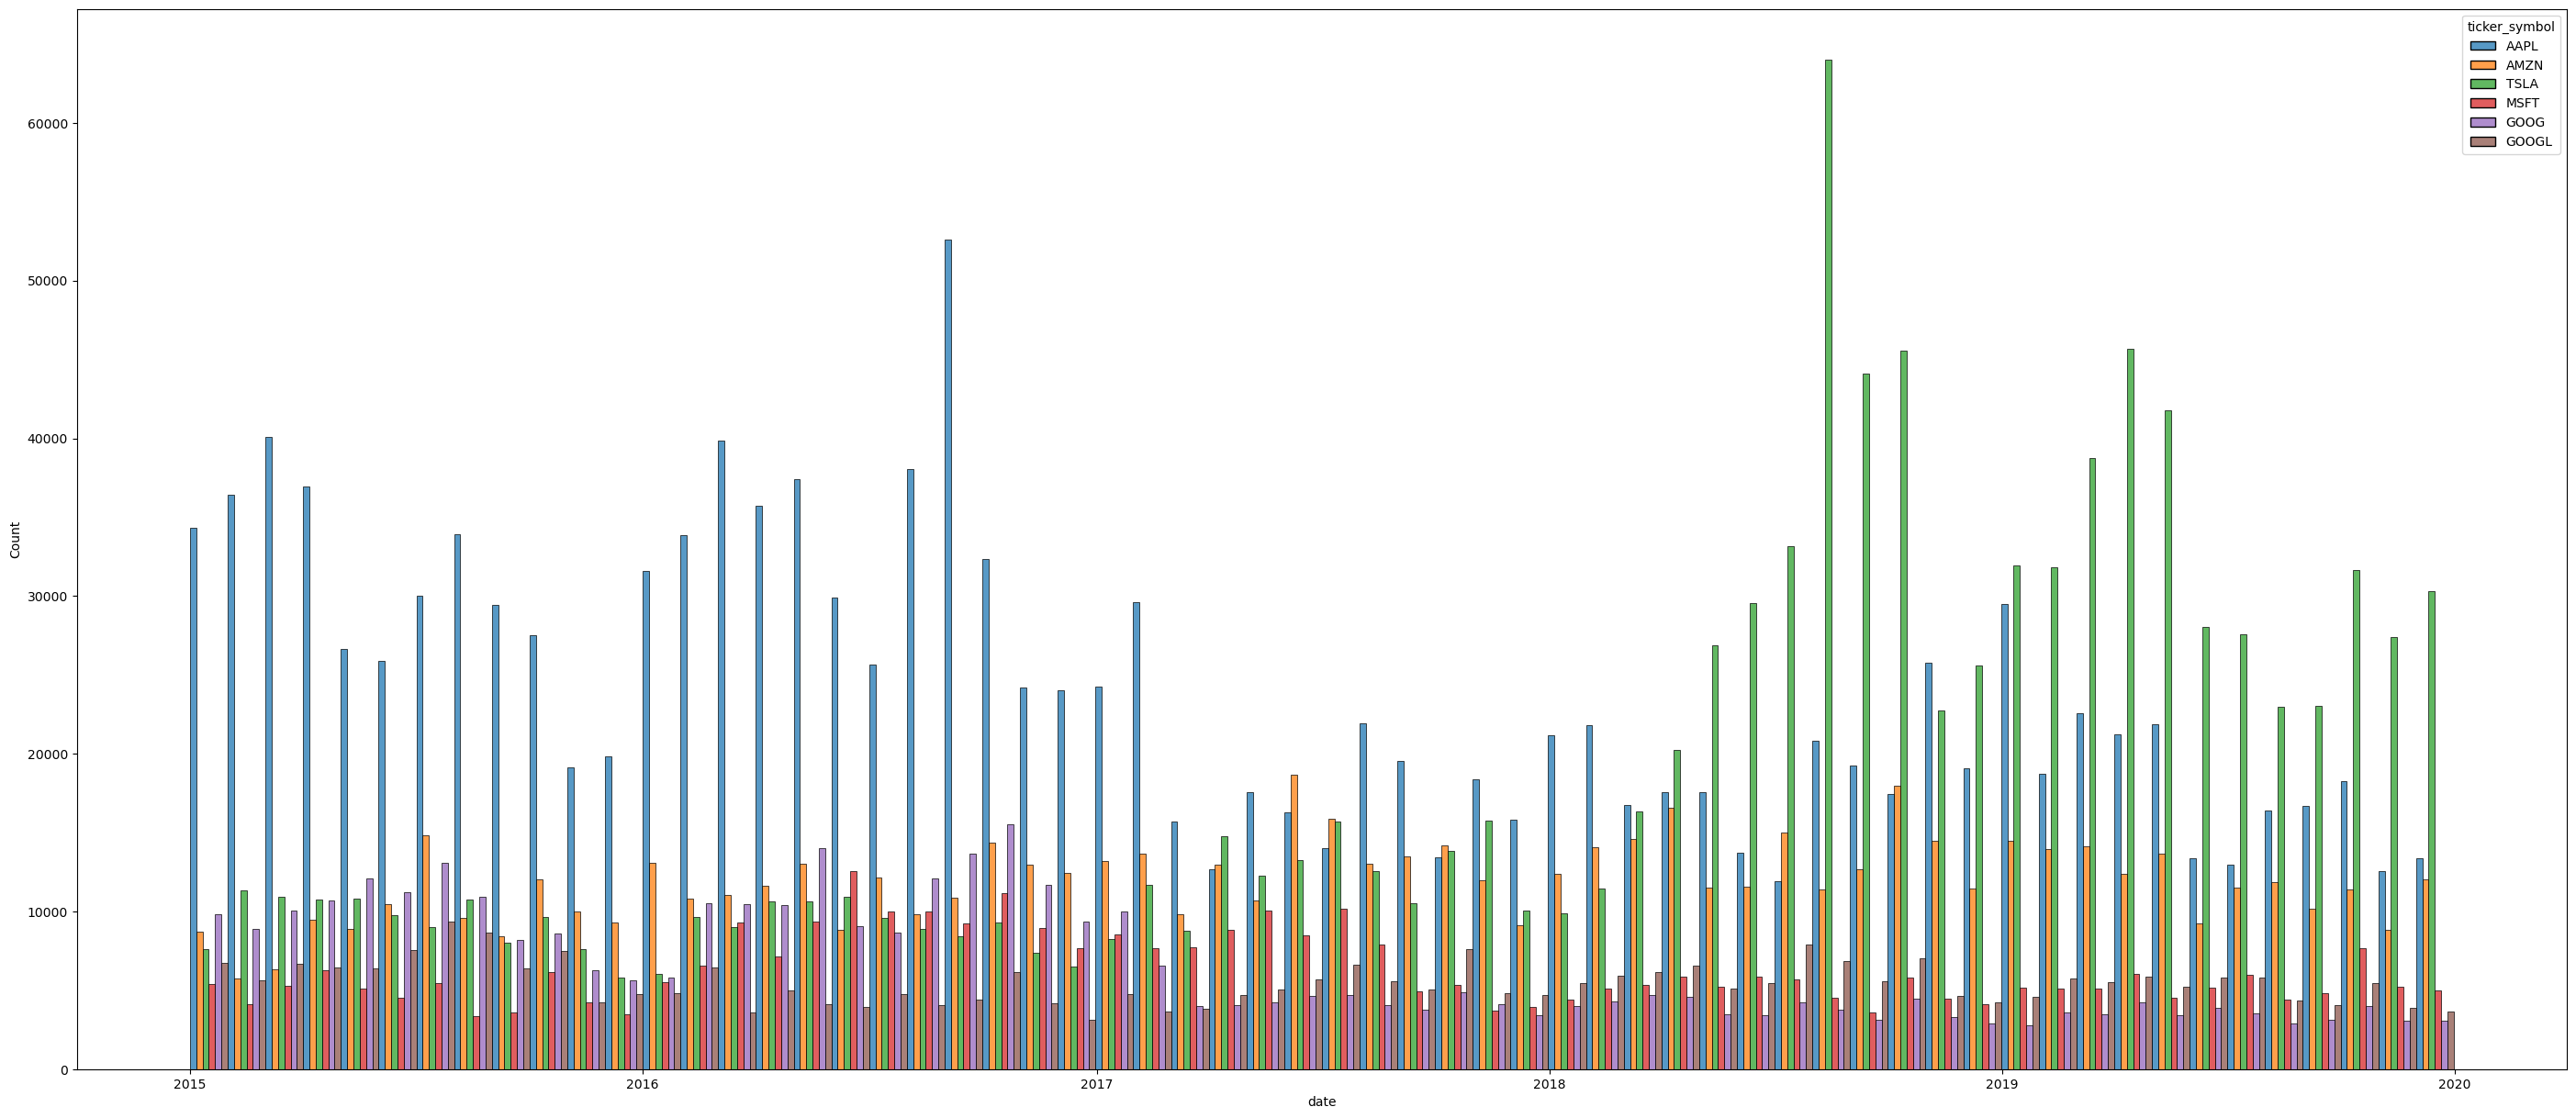

In [26]:
plt.subplots(figsize=(35, 15))
sns.histplot(data=df_final_data, x="date", hue="ticker_symbol", multiple="dodge", bins = 5*12)

### Daily engagement per day

In [27]:
fig_monthly_volume = px.bar(df_final_agg_tweet, x="ticker_symbol", y='engagement',
                            color='day_name_x', barmode="group",
                            title='Daily engagement per day')
fig_monthly_volume.show()

In [28]:
df_agg_sentiment = df_final_data.groupby(['ticker_symbol','phase','vader_sentiment'])\
                                                    .agg({
                                                        'tweet_id'          : "count",
                                                        'month_x'           : "max",
                                                        'day_name_x'        : "max",
                                                        'engagement'        : "sum"}).reset_index()
                                                        

df_agg_sentiment

ticker_symbol                            phase vader_sentiment  tweet_id  \
0           AAPL                     After-market        Negative     64302   
1           AAPL                     After-market         Neutral    159406   
2           AAPL                     After-market        Positive    133867   
3           AAPL                           Market        Negative     74328   
4           AAPL                           Market         Neutral    196342   
..           ...                              ...             ...       ...   
85          TSLA  Trading-days-out-of-market-time         Neutral     93187   
86          TSLA  Trading-days-out-of-market-time        Positive    121370   
87          TSLA       Weekend-out-of-market-time        Negative     39249   
88          TSLA       Weekend-out-of-market-time         Neutral     49635   
89          TSLA       Weekend-out-of-market-time        Positive     70683   

    month_x day_name_x  engagement  
0        12  Wednesday      100173  
1        12  Wednesday      199644  
2        12  Wednesday      225813  
3        12  Wednesday      135528  
4        12  Wednesday      266788  
..      ...        ...         ...  
85       12  Wednesday      574110  
86       12  Wednesday      992098  
87       12     Sunday      393942  
88       12     Sunday      329441  
89       12     Sunday      601086  

[90 rows x 7 columns]

### Sentiment Distribution by ticker

In [29]:
fig_tweet_sentiments = px.bar(df_agg_sentiment, x="vader_sentiment", y='tweet_id', 
                              color='ticker_symbol', barmode="group",
                              title='Sentiment distribution by ticker')
fig_tweet_sentiments.show()

In [30]:
def func_sentiment_overtime(tweet_df, stock_df, title, score_column_name="sentiment_score"):
    print("\n\n")
    fig = plt.figure(figsize=(24,10))
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()

    ax1.vlines(tweet_df['date'], 0, tweet_df[score_column_name]) 
    ax1.axhline(y=0, color='r', linestyle='-')

    
    ax2.plot(stock_df['date'], stock_df['close'], color='orange', label='Stock price')
    ax2.set_title("Effects of " + title + " tweets to stock price")
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    
    ax1.set_xlabel('Day date')
    ax1.set_ylabel('Sentiment Afinn score', color="blue")
    
    ax2.legend(lines + lines2, labels + labels2, loc=0)

    plt.show()

In [31]:
ticker_symbols =  df_final_data["ticker_symbol"].unique()

In [32]:
def func_draw_stock_price_with_sentiment(tweet_df, stock_df, start_day, end_day, score_name):
    for ticker_symbol in ticker_symbols:
        print(f"Ticker symbol: {ticker_symbol}")

        sub_company = df_ticker_sentiment_phase[df_ticker_sentiment_phase["ticker_symbol"] == ticker_symbol]["ticker_symbol"]

        print(f"Stock price of {ticker_symbol} company with ticker symbol is {ticker_symbol}")


        sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]
        sub_tweet_df = sub_tweet_df[(sub_tweet_df["date"]>=pd.to_datetime(start_day)) & (sub_tweet_df["date"]<=pd.to_datetime(end_day))]
        
        sub_stock_df = stock_df[stock_df["ticker_symbol"] == ticker_symbol]
        sub_stock_df = sub_stock_df[(sub_stock_df["date"]>=pd.to_datetime(start_day)) & (sub_stock_df["date"]<=pd.to_datetime(end_day))]

        func_sentiment_overtime(sub_tweet_df, sub_stock_df, ticker_symbol, score_column_name=score_name)

        plt.show()

### Effects of Tweets to stock price using Affin sentiment scores

Ticker symbol: AAPL
Stock price of AAPL company with ticker symbol is AAPL





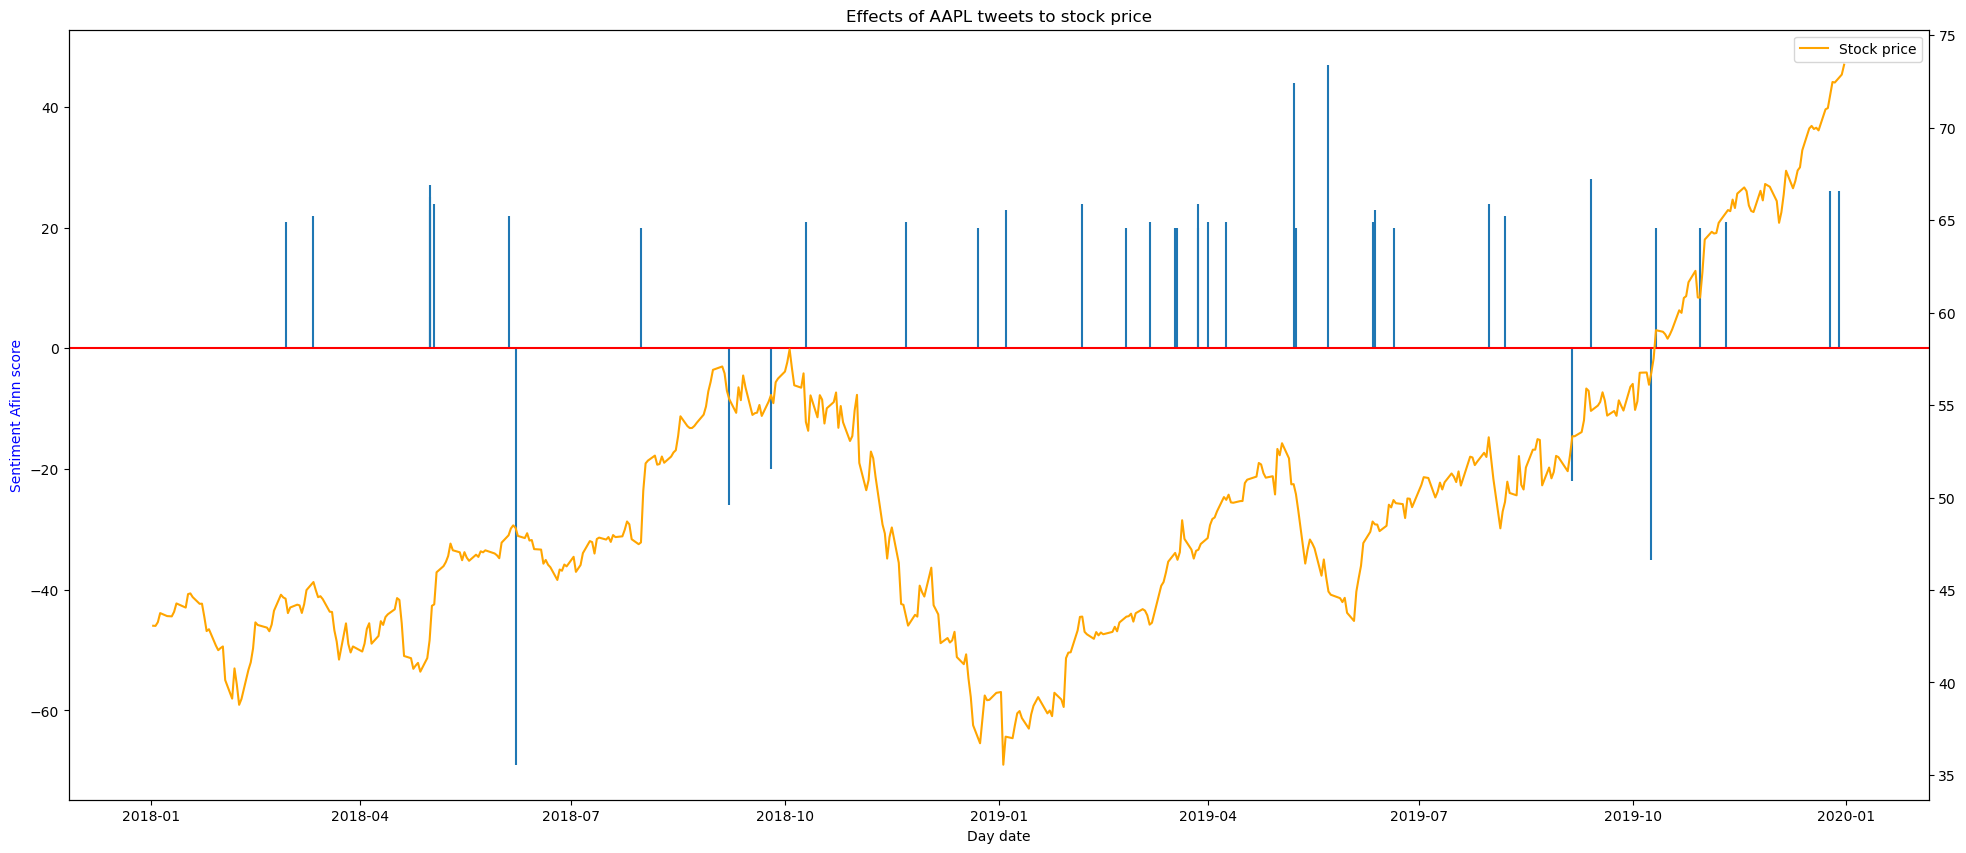

Ticker symbol: AMZN
Stock price of AMZN company with ticker symbol is AMZN





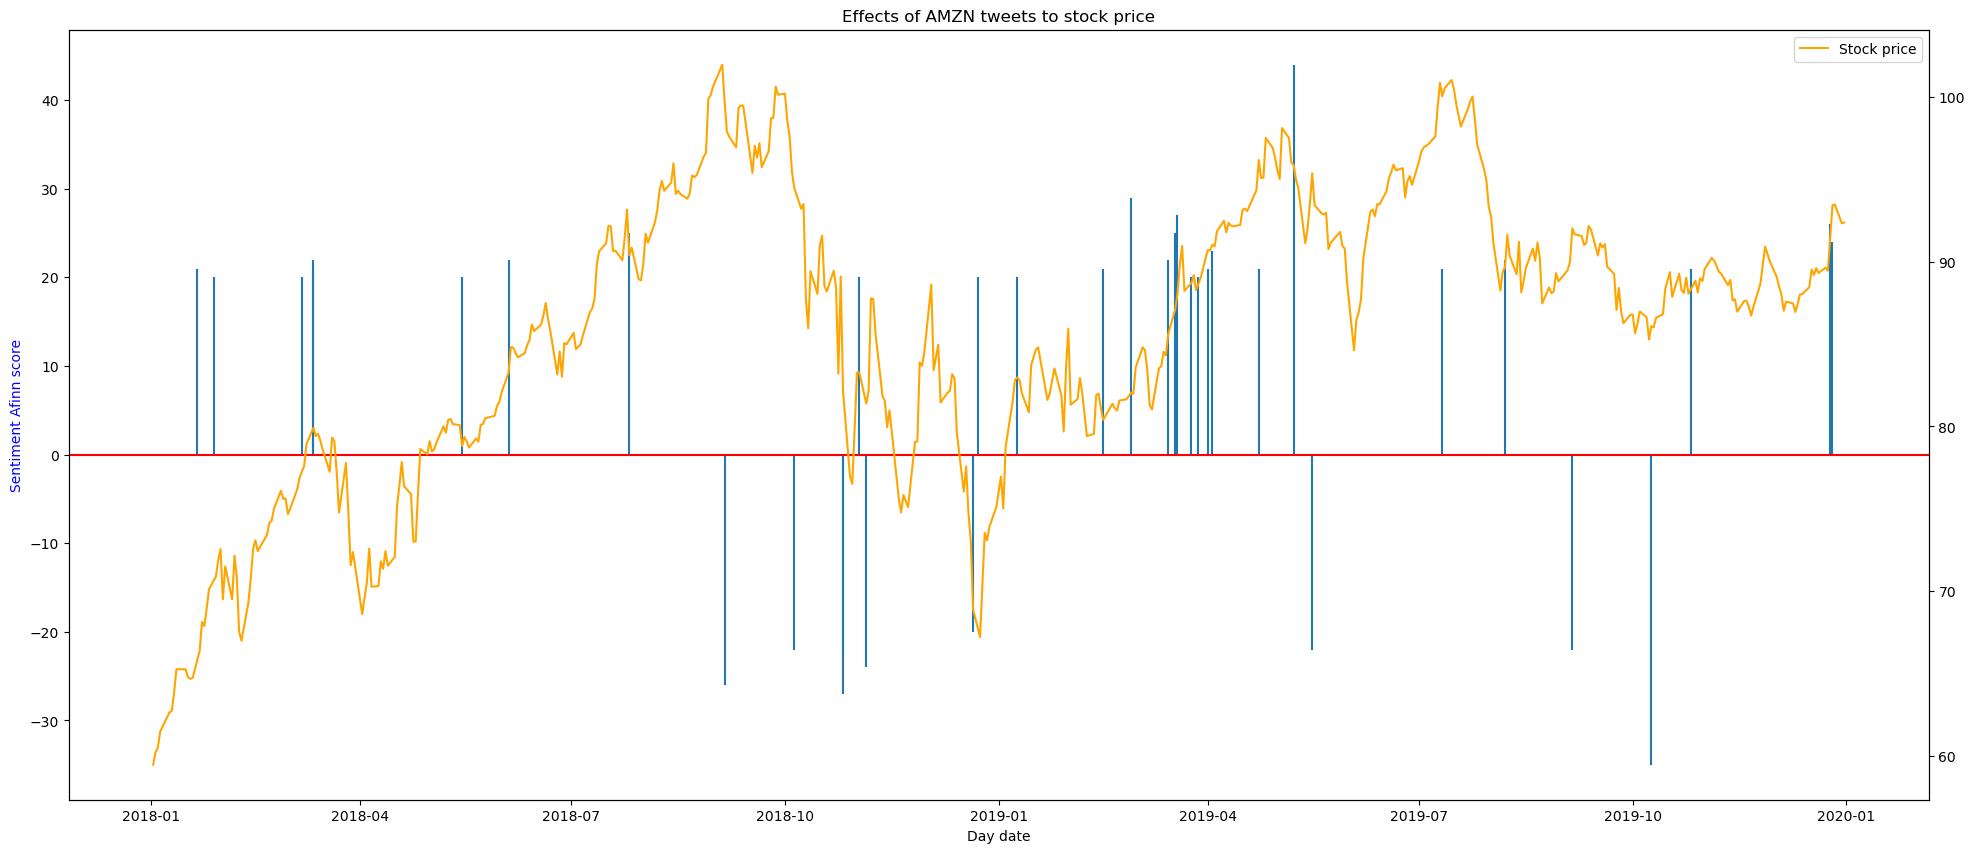

Ticker symbol: TSLA
Stock price of TSLA company with ticker symbol is TSLA





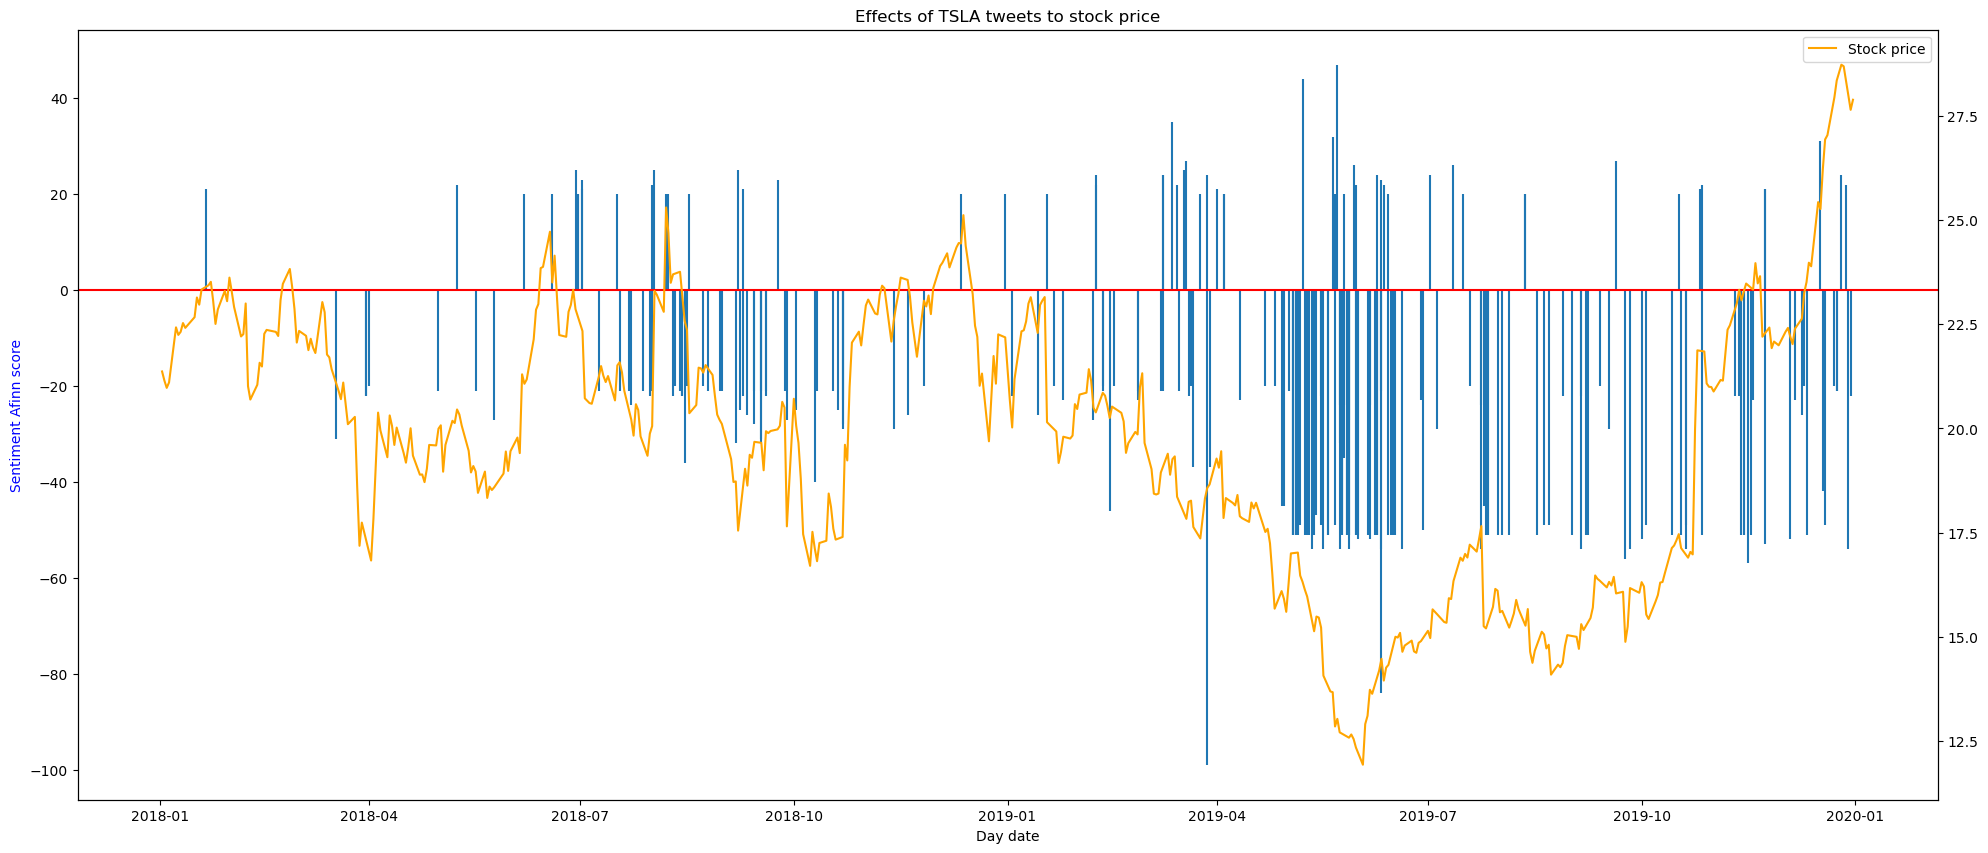

Ticker symbol: MSFT
Stock price of MSFT company with ticker symbol is MSFT





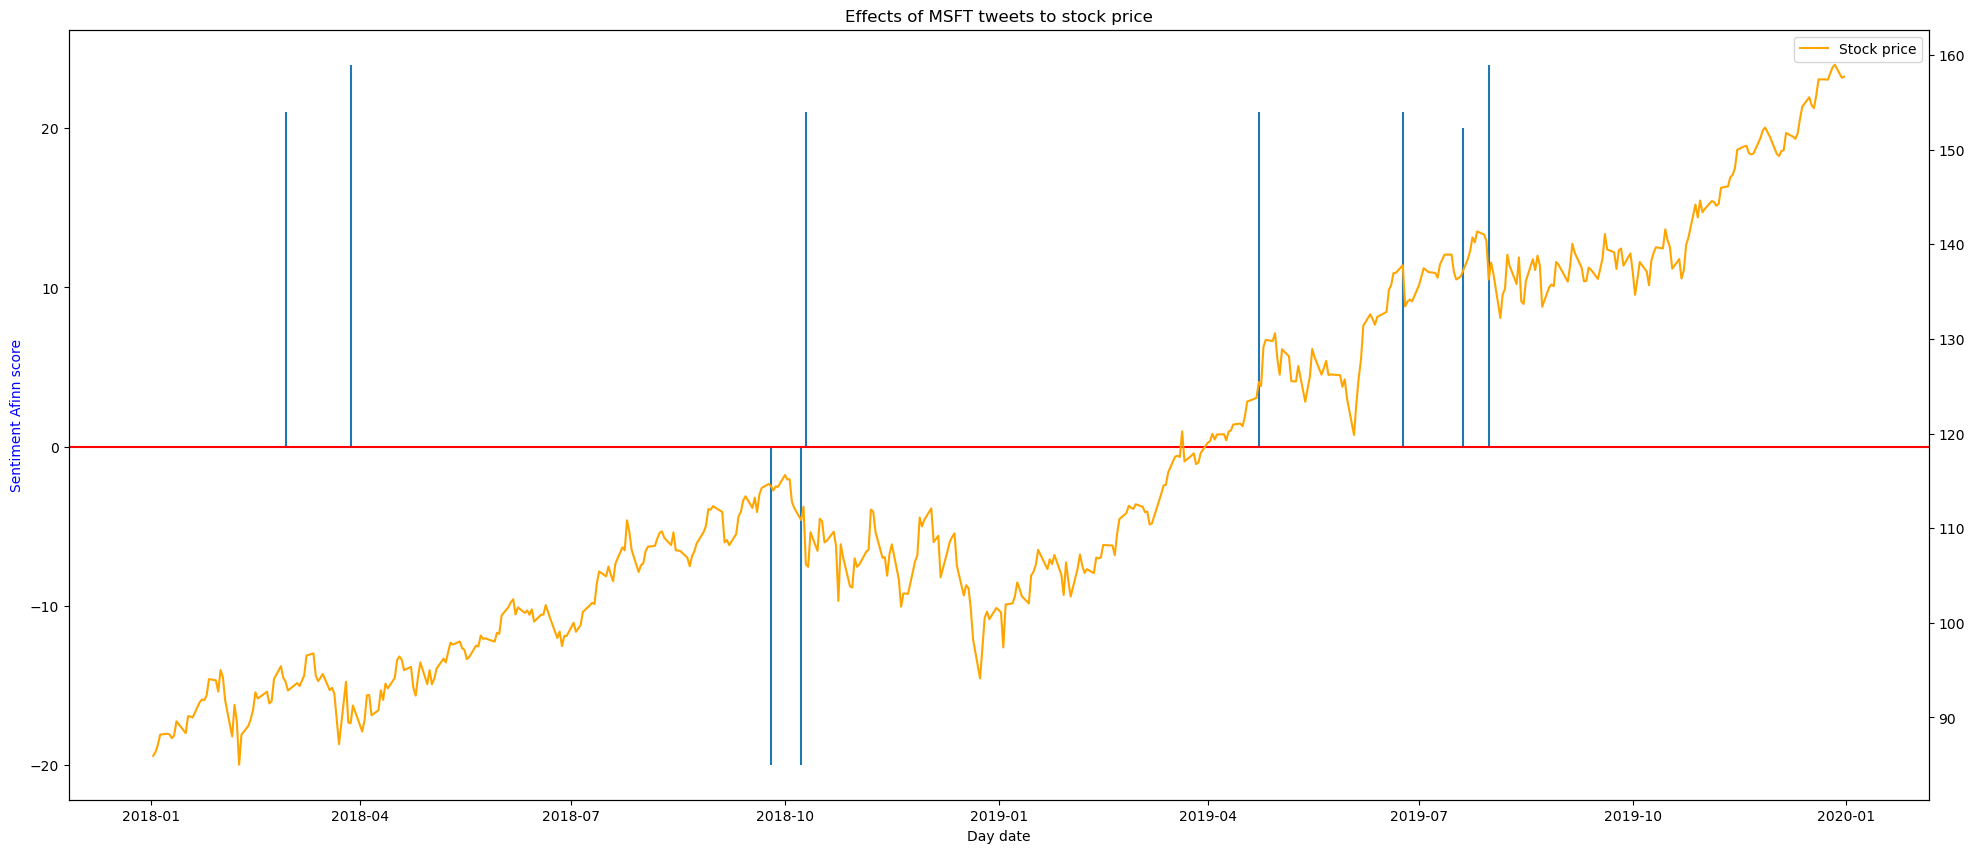

Ticker symbol: GOOG
Stock price of GOOG company with ticker symbol is GOOG





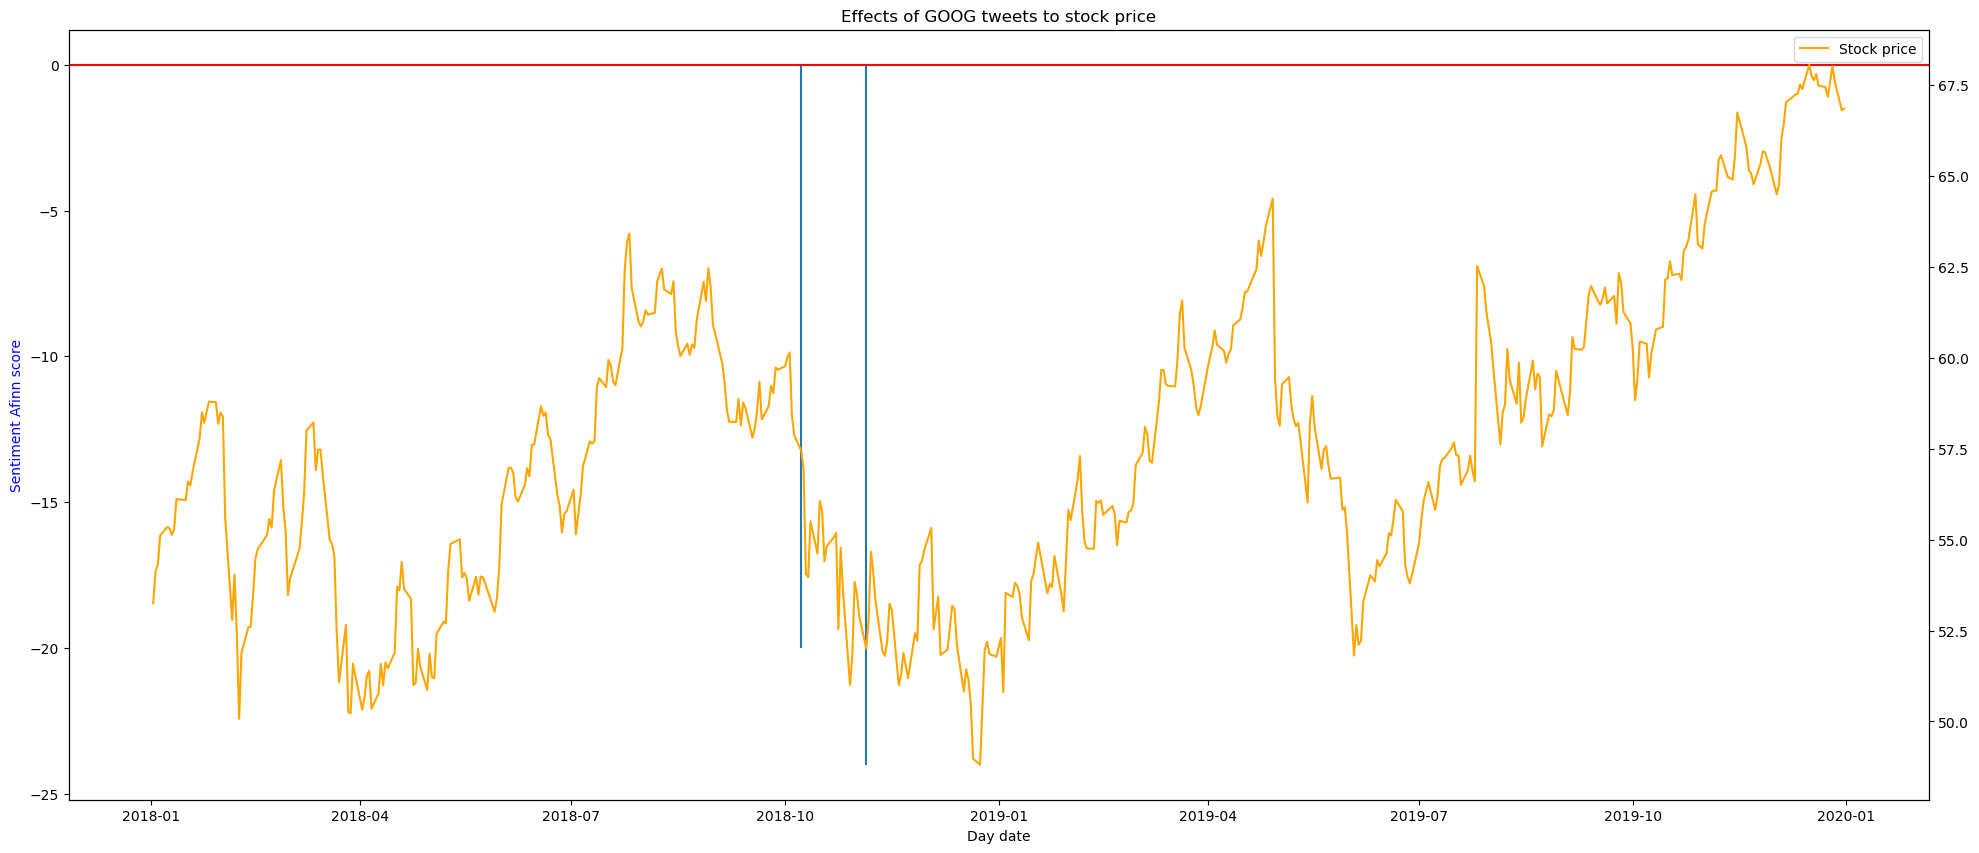

Ticker symbol: GOOGL
Stock price of GOOGL company with ticker symbol is GOOGL





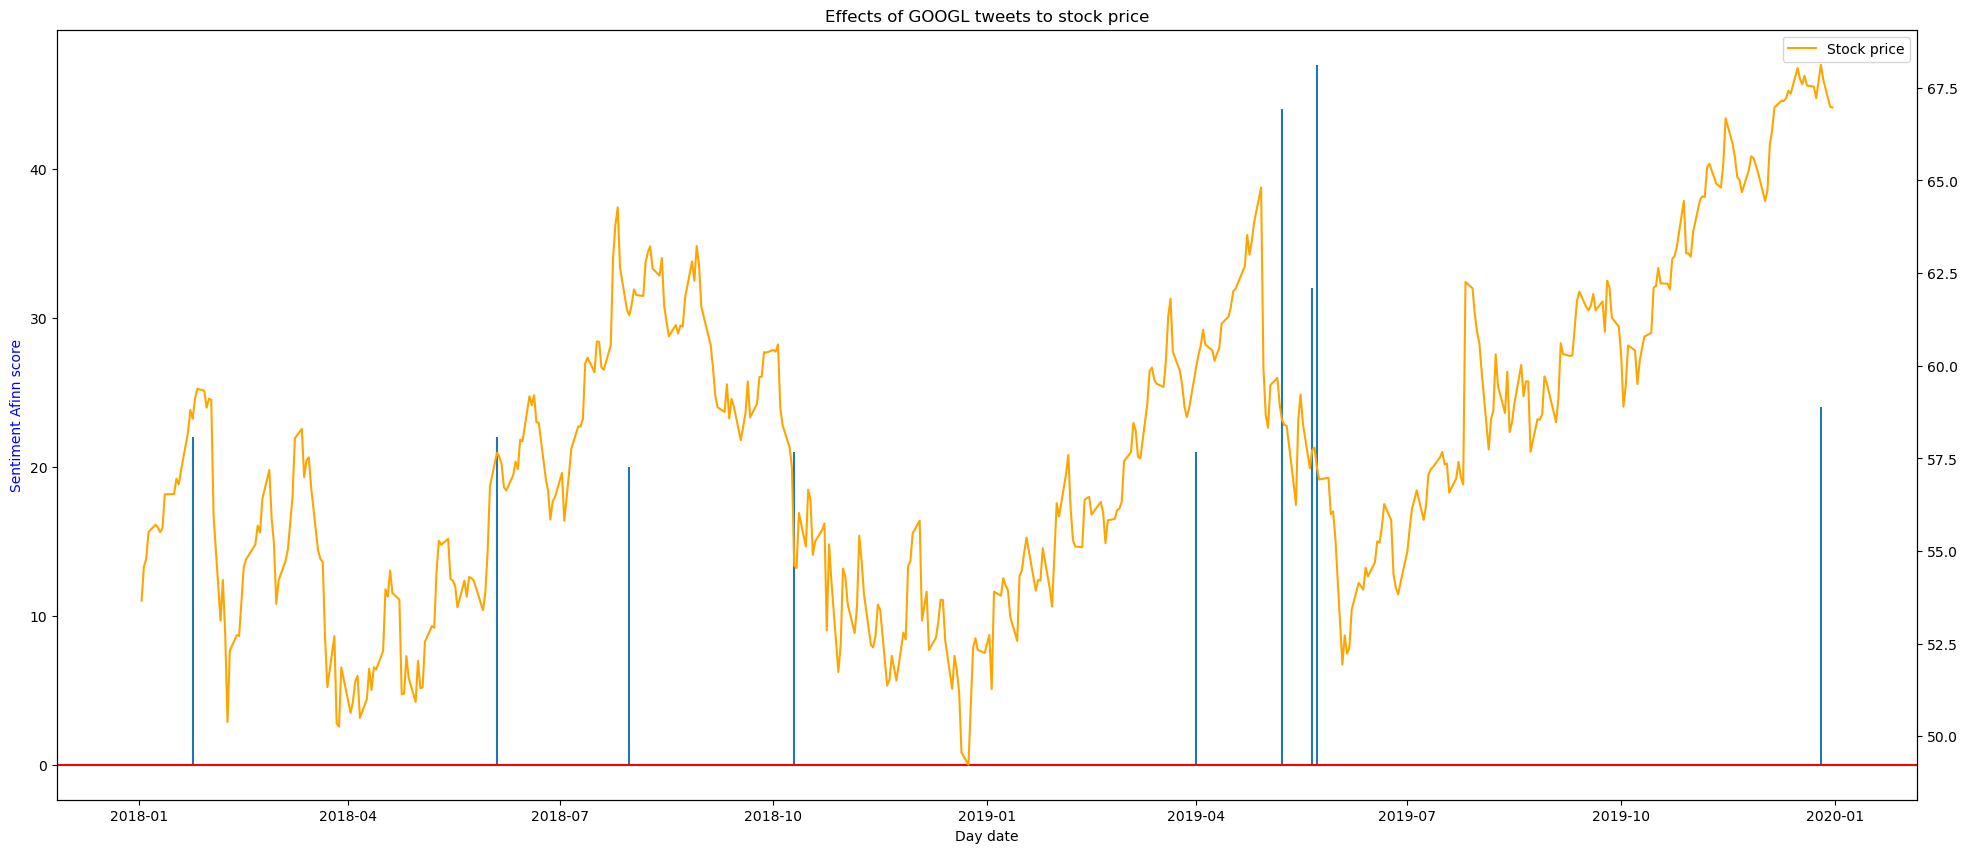

In [33]:
score_threshold = 20
score_column = "sentiment_score"

tmp_tweet_df = df_final_data[(df_final_data[score_column]<=-score_threshold) | (df_final_data[score_column]>=score_threshold)]

func_draw_stock_price_with_sentiment(tmp_tweet_df, 
                                     df_qoutes,
                                     start_day= dt(2018, 1, 1),
                                     end_day= max(df_qoutes['date']), 
                                     score_name=score_column)

### Effects of Tweets to stock price using Vader sentiment scores

Ticker symbol: AAPL
Stock price of AAPL company with ticker symbol is AAPL





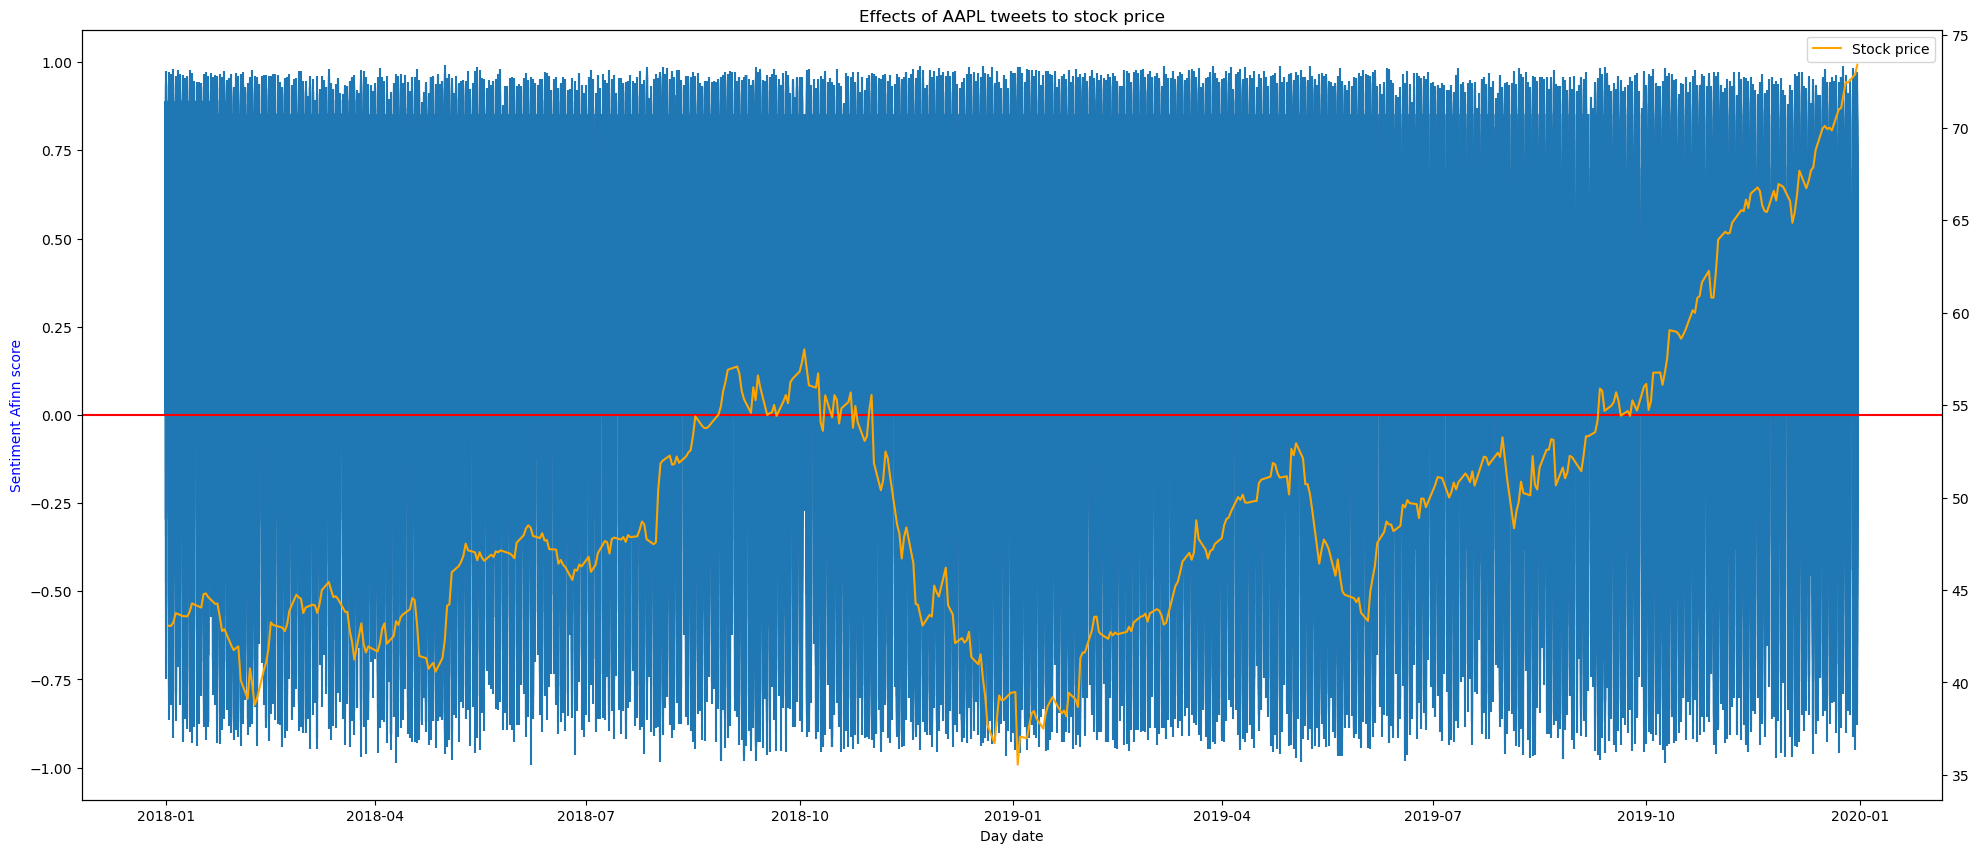

Ticker symbol: AMZN
Stock price of AMZN company with ticker symbol is AMZN





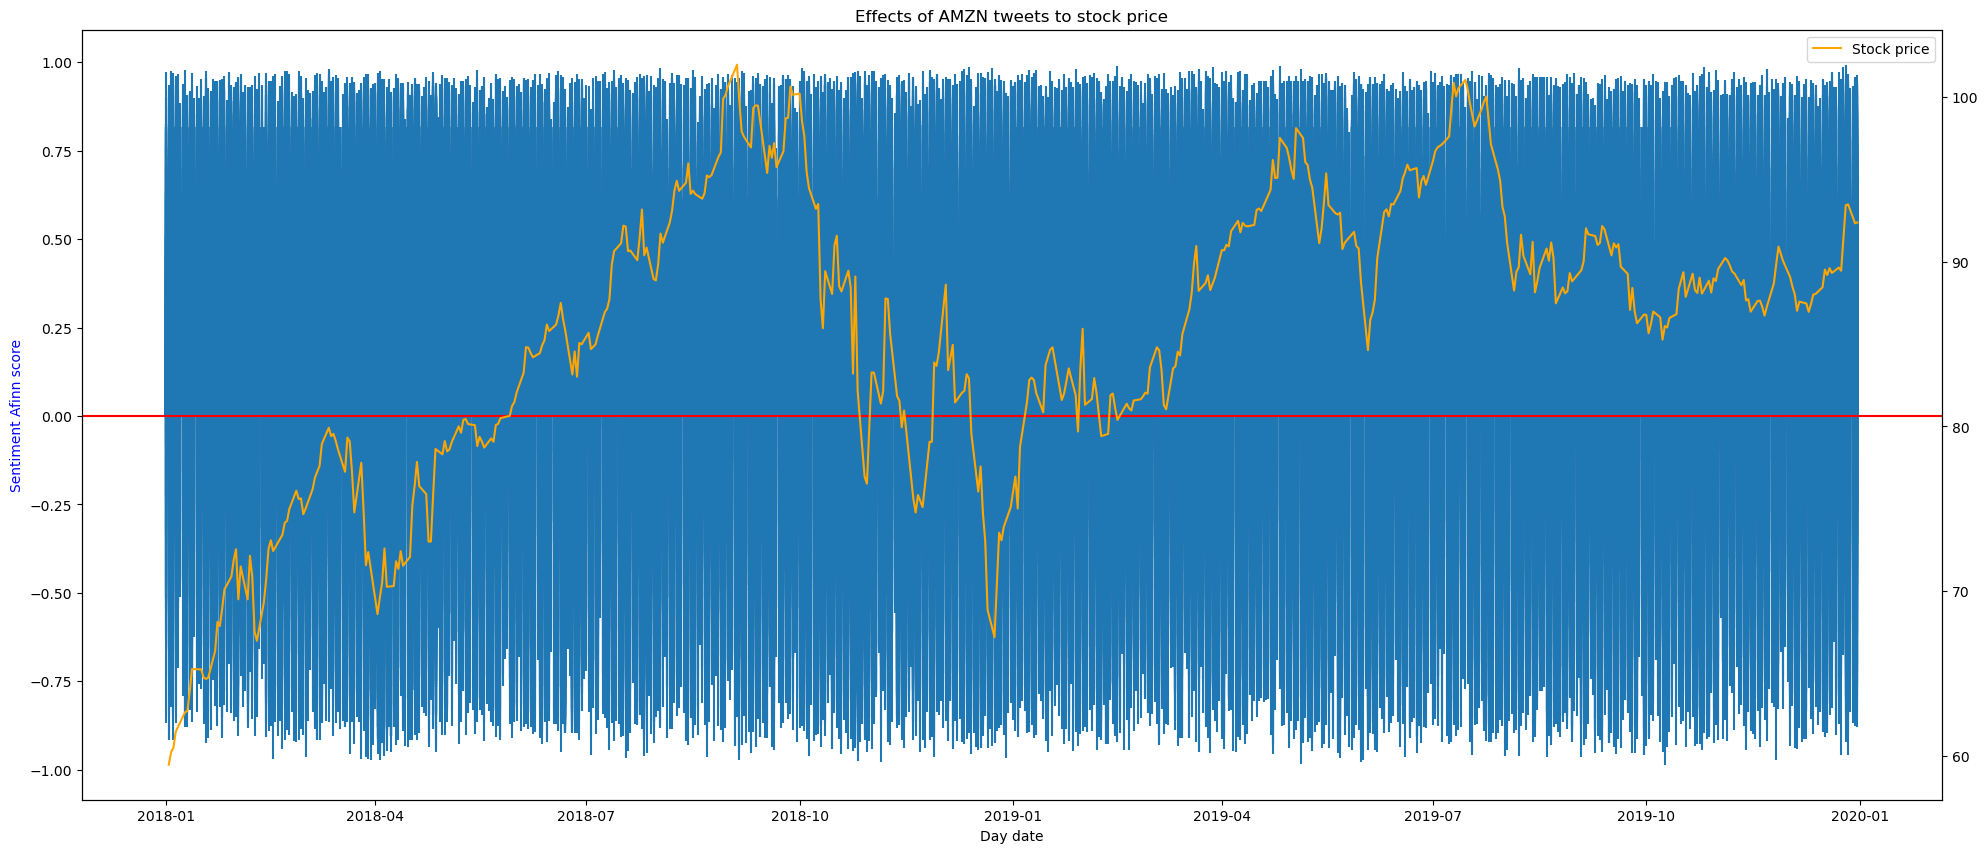

Ticker symbol: TSLA
Stock price of TSLA company with ticker symbol is TSLA





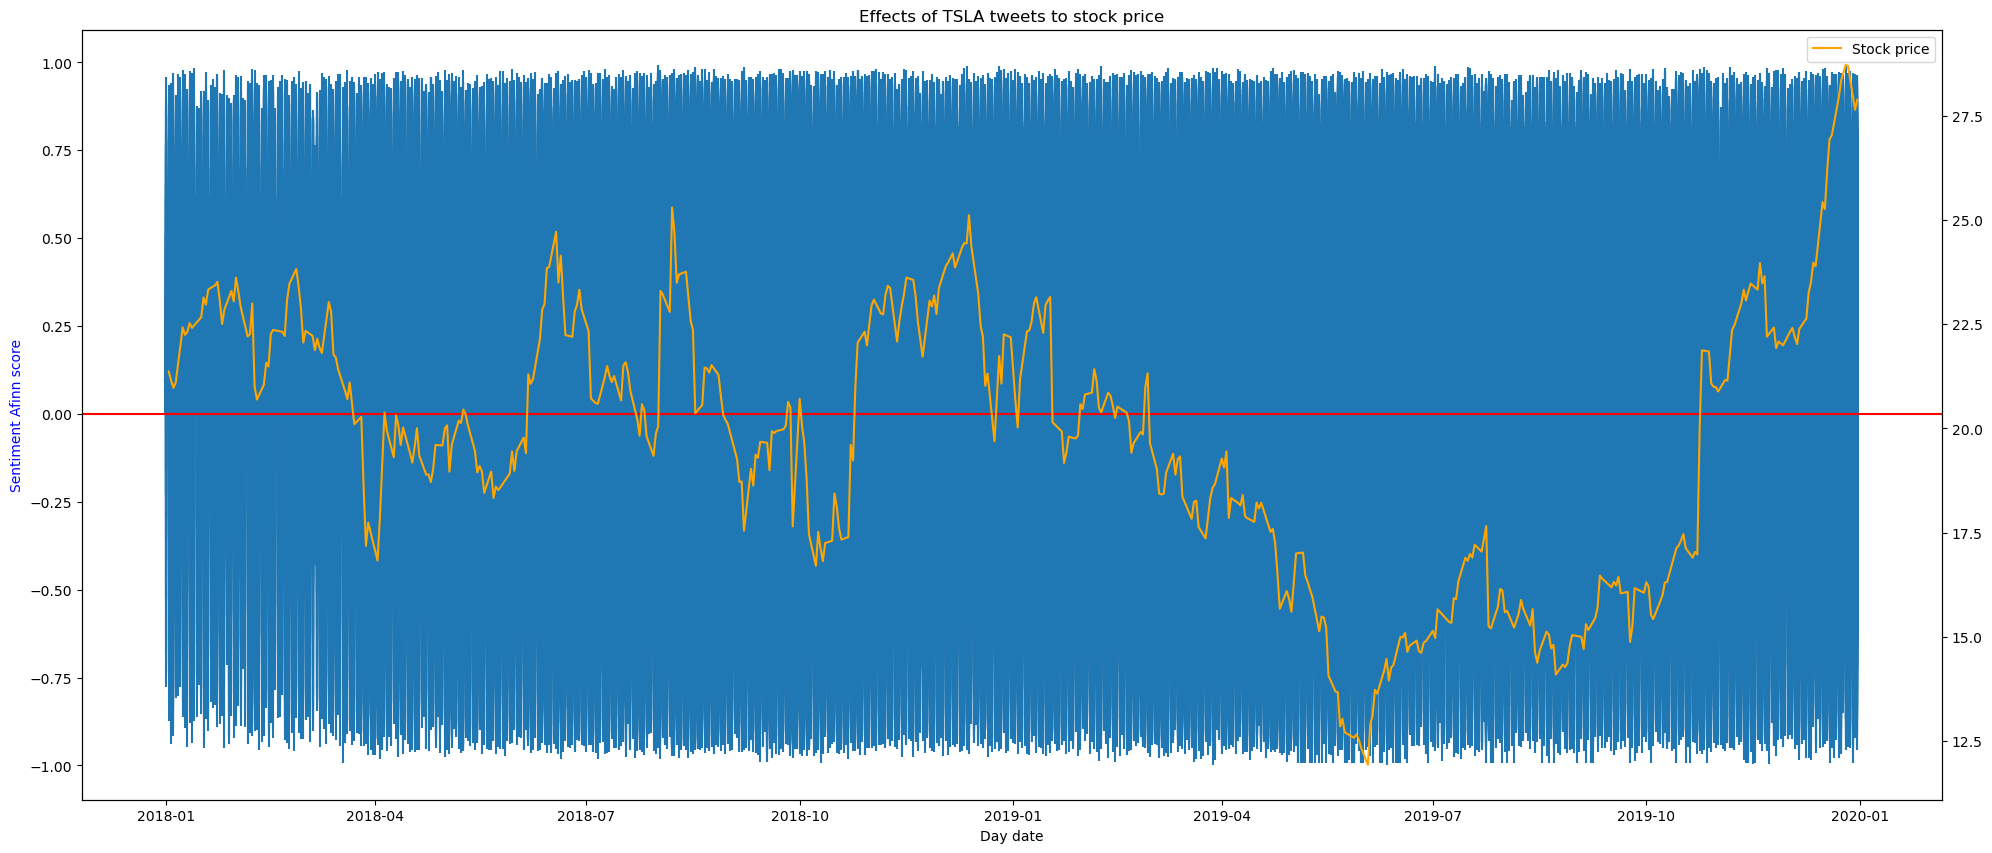

Ticker symbol: MSFT
Stock price of MSFT company with ticker symbol is MSFT





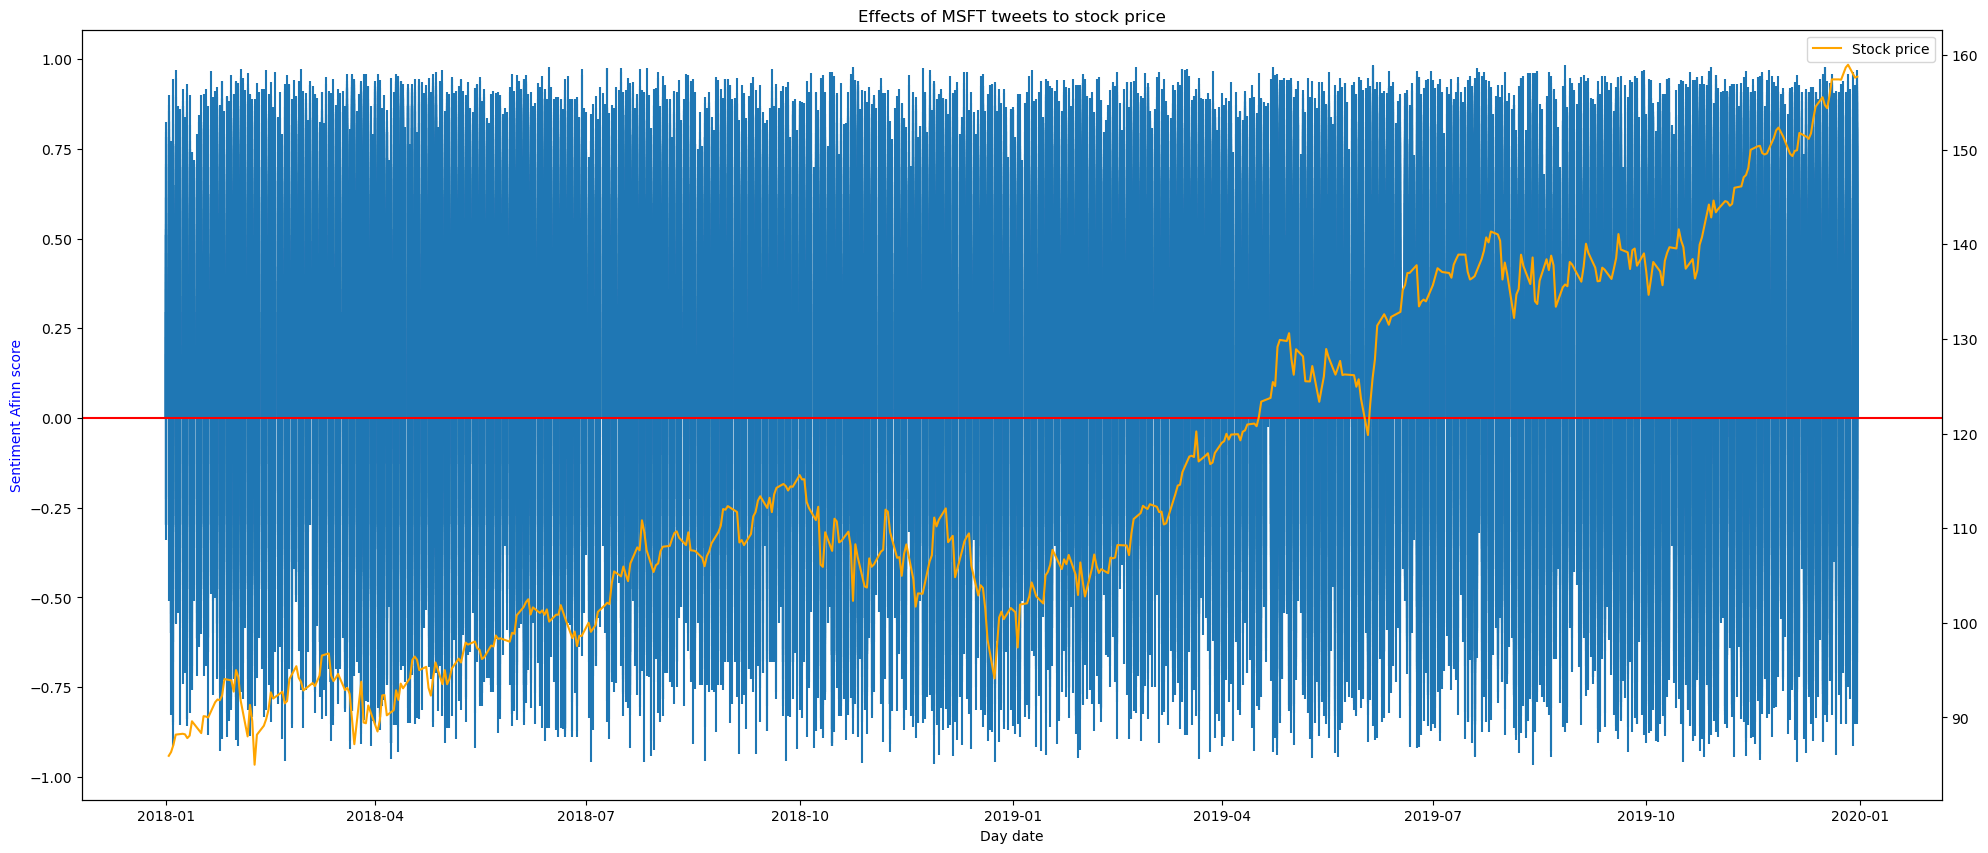

Ticker symbol: GOOG
Stock price of GOOG company with ticker symbol is GOOG





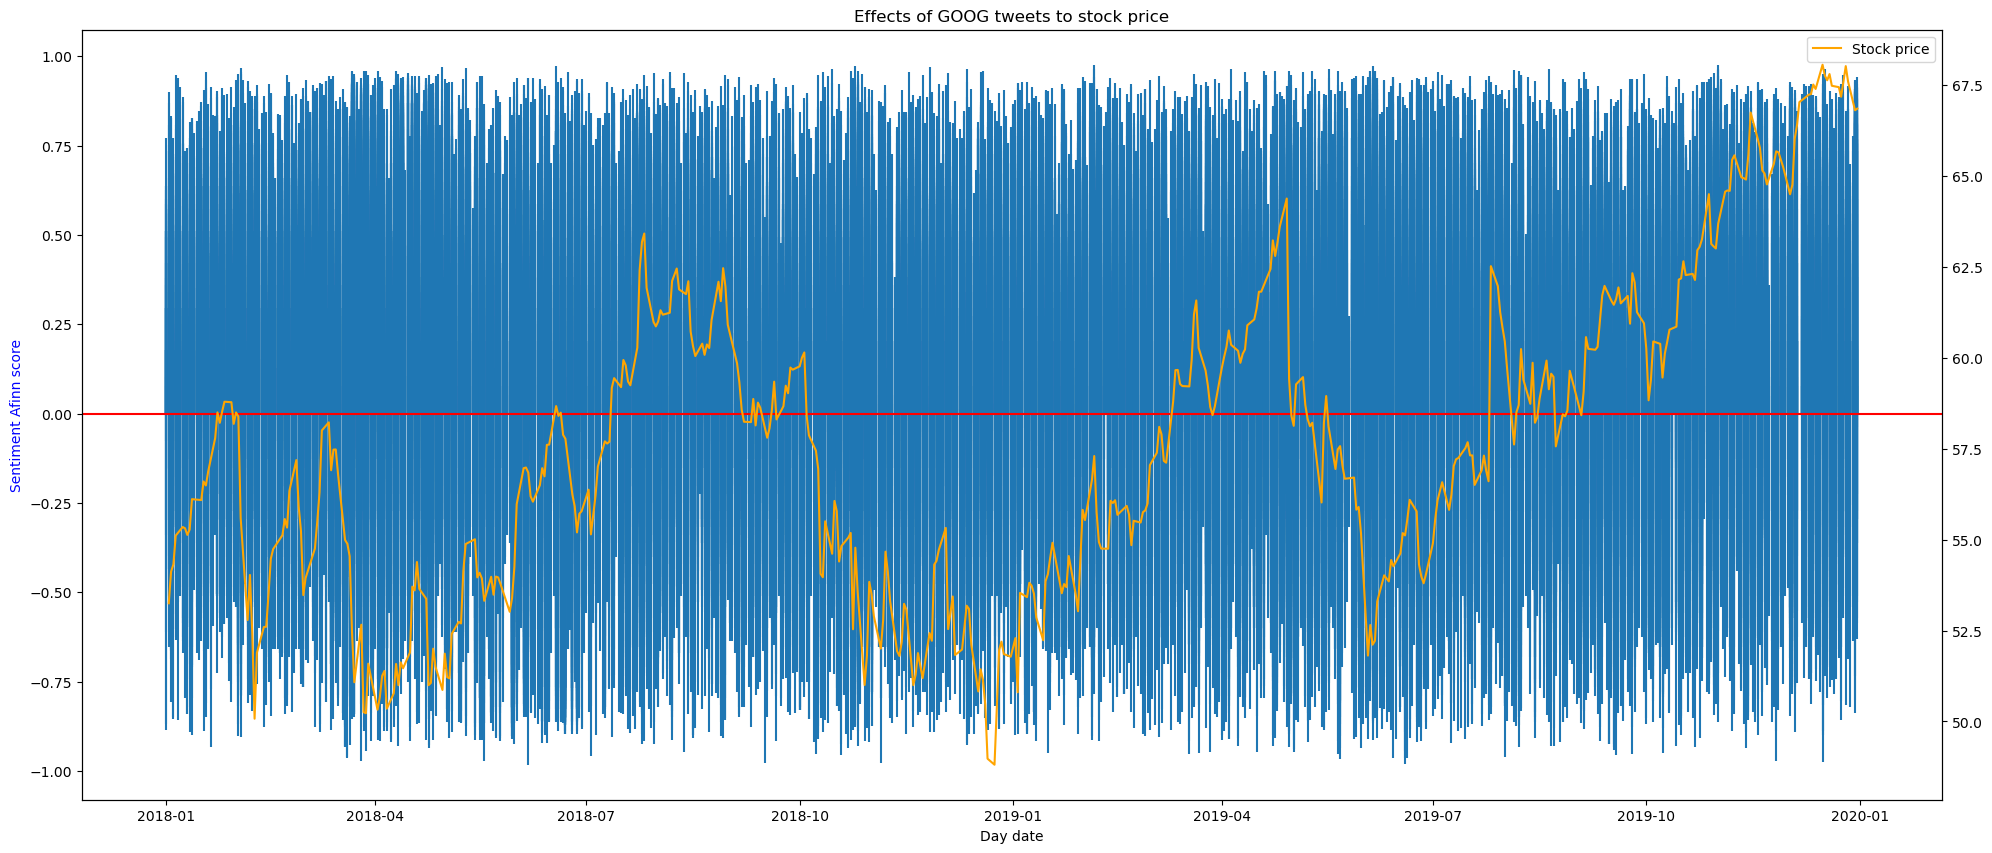

Ticker symbol: GOOGL
Stock price of GOOGL company with ticker symbol is GOOGL





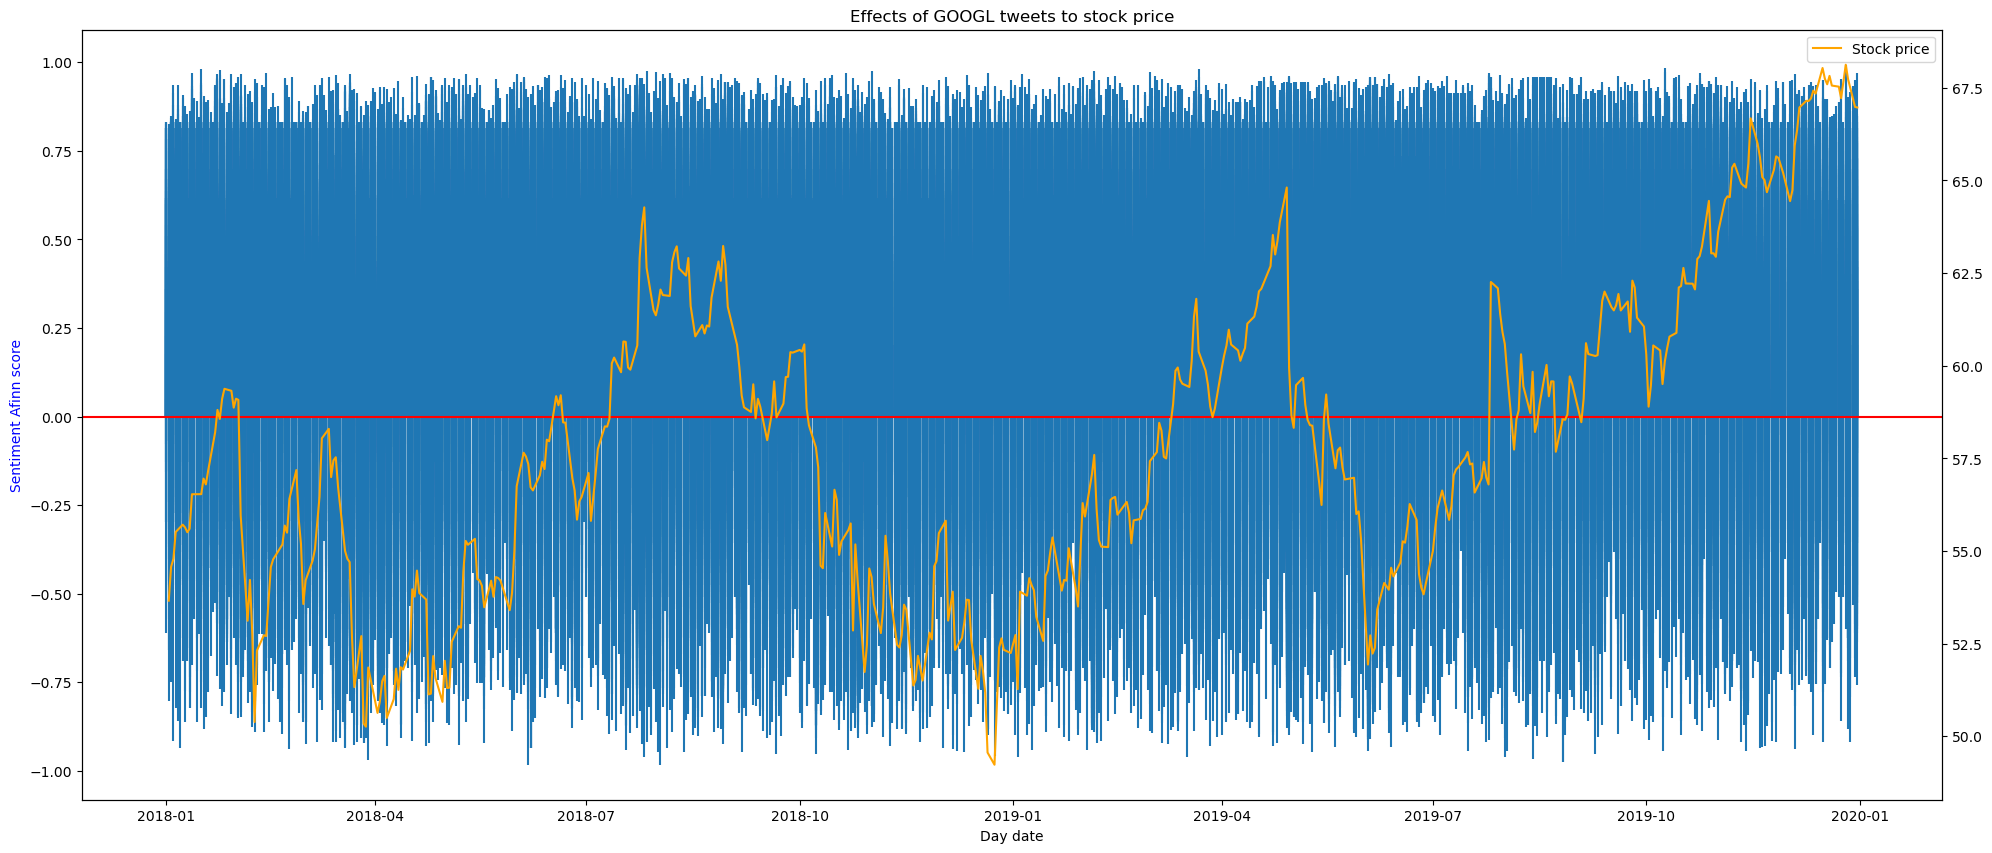

In [34]:
score_threshold = 0
score_column = "vader_score"

tmp_tweet_df = df_final_data[(df_final_data[score_column]<=-score_threshold) | (df_final_data[score_column]>=score_threshold)]

func_draw_stock_price_with_sentiment(tmp_tweet_df, 
                                     df_qoutes,
                                     start_day= dt(2018, 1, 1),
                                     end_day= max(df_qoutes['date']), 
                                     score_name=score_column)

## Google Stock Prediction using Generative Adversarial Networks (GANs) 

### Data preparation

In [35]:
df_quotes_GOOGL = df_qoutes[df_qoutes['ticker_symbol'] == 'GOOGL']

In [36]:
df_quotes_GOOGL = df_quotes_GOOGL[['date','open','high','low','close','adjclose','volume']]

In [37]:
df_quotes_GOOGL

date       open       high        low      close   adjclose  \
6295 2014-12-31  26.886999      26.92      26.51  26.533001  26.533001   
6296 2015-01-02  26.629999  26.790001  26.393999  26.477501  26.477501   
6297 2015-01-05    26.3575    26.3995  25.887501     25.973     25.973   
6298 2015-01-06     26.025  26.060499    25.2775  25.332001  25.332001   
6299 2015-01-07  25.547501  25.574499  25.182501    25.2575    25.2575   
...         ...        ...        ...        ...        ...        ...   
7549 2019-12-24  67.510498  67.600502  67.208504  67.221497  67.221497   
7550 2019-12-26  67.327499  68.160004  67.275497  68.123497  68.123497   
7551 2019-12-27  68.199997  68.352501  67.650002  67.732002  67.732002   
7552 2019-12-30    67.8405  67.849998  66.891998  66.985497  66.985497   
7553 2019-12-31  66.789497  67.032997  66.606499  66.969498  66.969498   

        volume  
6295  24648000  
6296  26480000  
6297  41182000  
6298  54456000  
6299  46918000  
...        ...  
7549  13468000  
7550  23662000  
7551  23212000  
7552  19994000  
7553  19514000  

[1259 rows x 7 columns]

In [38]:
df_agg_ticker_sentiment = df_final_data.groupby(['date','ticker_symbol'])\
                                                    .agg({
                                                        'tweet_id'          : "count", 
                                                        'close'             : "max",
                                                        'volume'            : "max",
                                                        'vader_score'      : "mean",
                                                        'sentiment_score'   : "mean"
                                                        }).reset_index()
                                                        
df_agg_ticker_sentiment_GOOGLE= df_agg_ticker_sentiment[df_agg_ticker_sentiment['ticker_symbol'] == 'GOOGL']
df_agg_ticker_sentiment_GOOGLE

date ticker_symbol  tweet_id      close      volume  vader_score  \
3     2015-01-01         GOOGL        45        NaN         NaN     0.169729   
9     2015-01-02         GOOGL       111  26.477501  26480000.0     0.124008   
15    2015-01-03         GOOGL       140        NaN         NaN     0.429474   
21    2015-01-04         GOOGL       140        NaN         NaN     0.476041   
27    2015-01-05         GOOGL       231  25.973000  41182000.0     0.352378   
...          ...           ...       ...        ...         ...          ...   
10921 2019-12-27         GOOGL       159  67.732002  23212000.0     0.212240   
10927 2019-12-28         GOOGL        50        NaN         NaN     0.202374   
10933 2019-12-29         GOOGL        37        NaN         NaN     0.322254   
10939 2019-12-30         GOOGL       128  66.985497  19994000.0     0.199493   
10945 2019-12-31         GOOGL       120  66.969498  19514000.0     0.125885   

       sentiment_score  
3             1.044444  
9             0.612613  
15            1.014286  
21            1.342857  
27            1.177489  
...                ...  
10921         1.081761  
10927         0.880000  
10933         1.000000  
10939         0.968750  
10945         0.700000  

[1826 rows x 7 columns]

In [39]:
df_agg_ticker_sentiment_GOOGLE = df_agg_ticker_sentiment_GOOGLE[['date','vader_score','sentiment_score']]
df_agg_ticker_sentiment_GOOGLE

date  vader_score  sentiment_score
3     2015-01-01     0.169729         1.044444
9     2015-01-02     0.124008         0.612613
15    2015-01-03     0.429474         1.014286
21    2015-01-04     0.476041         1.342857
27    2015-01-05     0.352378         1.177489
...          ...          ...              ...
10921 2019-12-27     0.212240         1.081761
10927 2019-12-28     0.202374         0.880000
10933 2019-12-29     0.322254         1.000000
10939 2019-12-30     0.199493         0.968750
10945 2019-12-31     0.125885         0.700000

[1826 rows x 3 columns]

In [40]:
df_merged_stock_sentimental_GOOGL = df_quotes_GOOGL.merge(df_agg_ticker_sentiment_GOOGLE, on=['date'], how='left')
df_merged_stock_sentimental_GOOGL

date       open       high        low      close   adjclose  \
0    2014-12-31  26.886999      26.92      26.51  26.533001  26.533001   
1    2015-01-02  26.629999  26.790001  26.393999  26.477501  26.477501   
2    2015-01-05    26.3575    26.3995  25.887501     25.973     25.973   
3    2015-01-06     26.025  26.060499    25.2775  25.332001  25.332001   
4    2015-01-07  25.547501  25.574499  25.182501    25.2575    25.2575   
...         ...        ...        ...        ...        ...        ...   
1254 2019-12-24  67.510498  67.600502  67.208504  67.221497  67.221497   
1255 2019-12-26  67.327499  68.160004  67.275497  68.123497  68.123497   
1256 2019-12-27  68.199997  68.352501  67.650002  67.732002  67.732002   
1257 2019-12-30    67.8405  67.849998  66.891998  66.985497  66.985497   
1258 2019-12-31  66.789497  67.032997  66.606499  66.969498  66.969498   

        volume  vader_score  sentiment_score  
0     24648000          NaN              NaN  
1     26480000     0.124008         0.612613  
2     41182000     0.352378         1.177489  
3     54456000     0.364896         1.213523  
4     46918000     0.308681         0.824841  
...        ...          ...              ...  
1254  13468000     0.149336         0.857143  
1255  23662000     0.230894         1.385714  
1256  23212000     0.212240         1.081761  
1257  19994000     0.199493         0.968750  
1258  19514000     0.125885         0.700000  

[1259 rows x 9 columns]

In [41]:
df_merged_stock_sentimental_GOOGL = df_merged_stock_sentimental_GOOGL.dropna(axis=0)
df_merged_stock_sentimental_GOOGL

# Convert 'close' column to numeric
df_merged_stock_sentimental_GOOGL['close'] = pd.to_numeric(df_merged_stock_sentimental_GOOGL['close'], errors='coerce')


C:\Users\vjaga\AppData\Local\Temp\ipykernel_10244\356595552.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
df_merged_stock_sentimental_GOOGL.to_csv(r'df_merged_stock_sentimental_GOOGL.csv',index=False)

### Google stock price over the years

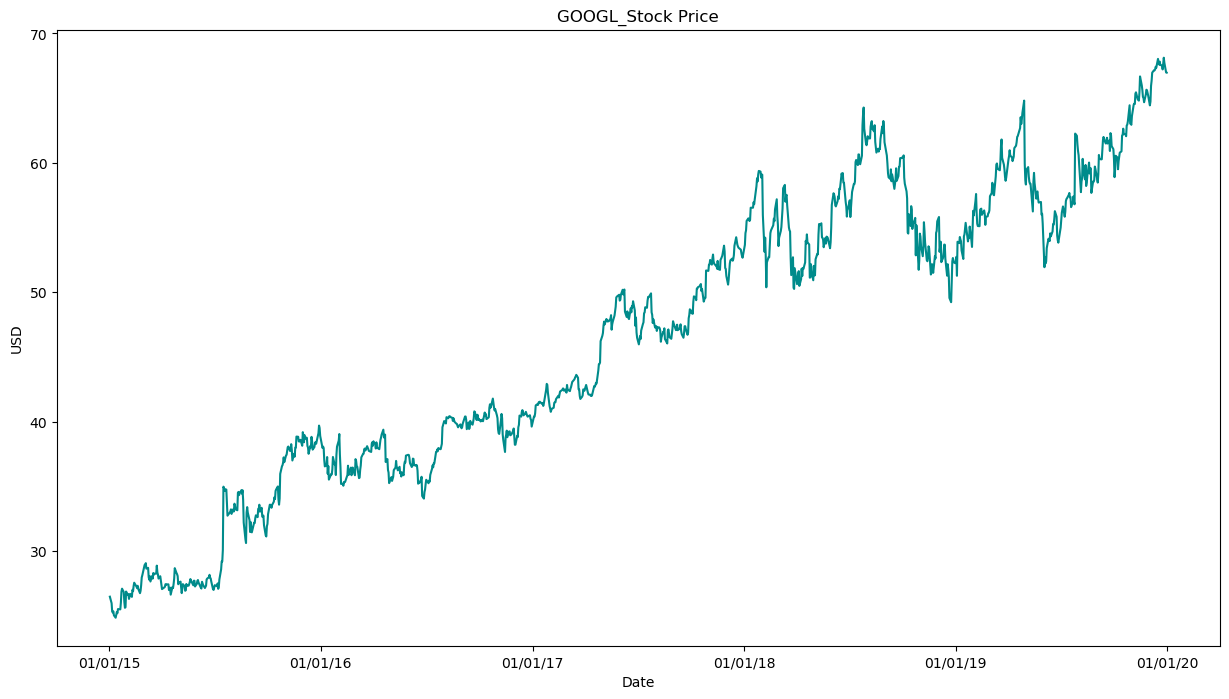

In [43]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_merged_stock_sentimental_GOOGL['date'], df_merged_stock_sentimental_GOOGL['close'], color='#008B8B')
ax.set(xlabel="Date", ylabel="USD", title="GOOGL_Stock Price")
ax.xaxis.set_major_formatter(DateFormatter("%D"))
plt.show()

### Feature Engineering - Adding technical indicators

To provide the network with a broader perspective of the market, we incorporate various technical indicators into the training dataset. These indicators include moving averages, Bollinger bands, and others, which depict the evolution of stock prices over not just the present day, but also the preceding week or longer periods.

MA(7) stands for Moving Average for past 7 days, whereas MA(20) means Moving Average for past 20 days.

EMA is Exponential Moving average and we can calculate it as:

EMA_t = Pclose + (EMA_t-1 (100 - P))*
Bollinger Bands are calculated as:

middle line: stdev(MA(20))
upper bound: MA(20) + 2stdev(MA(20))
lower bound: MA(20) - 2stdev(MA(20))


In [44]:
def get_technical_indicator(data):
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean() #Moving Average for past 7 days
    data['MA20'] = data.iloc[:,4].rolling(window=20).mean() #Moving Average for past 20 days

    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #Moving Average Convergence Divergence is the difference of Closing price and Opening Price

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 4].rolling(20).std()   # 20-day Standard Deviation
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2) #Upper Bollinger Band, calculated as the sum of the 20-day MA 
                                                            #and twice the 20-day standard deviation.
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2) #Lower Bollinger Band, calculated as the difference of the 20-day MA 
                                                            #and twice the 20-day standard deviation.

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(np.abs(data.iloc[:, 4] - 1))

    return data

In [45]:
tech_df = get_technical_indicator(df_merged_stock_sentimental_GOOGL)
dataset = tech_df.iloc[20:,:].reset_index(drop=True)
dataset.head()

C:\Users\vjaga\AppData\Local\Temp\ipykernel_10244\2466309548.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vjaga\AppData\Local\Temp\ipykernel_10244\2466309548.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vjaga\AppData\Local\Temp\ipykernel_10244\2466309548.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

date       open       high        low      close   adjclose    volume  \
0 2015-02-02     26.716  26.825001     26.086  26.610001  26.610001  75378000   
1 2015-02-03     26.497  26.872499    26.3405  26.665001  26.665001  47062000   
2 2015-02-04     26.657    26.8375  26.251499  26.305000     26.305  33896000   
3 2015-02-05    26.3965    26.5345     26.282  26.491501  26.491501  33176000   
4 2015-02-06  26.550501     27.011  26.432501  26.694000     26.694  42938000   

   vader_score  sentiment_score        MA7       MA20      MACD      20SD  \
0     0.259863         1.118812  26.394786  25.802600 -0.140242  0.703018   
1     0.264262         1.260000  26.333000  25.837200 -0.134387  0.728416   
2     0.327709         1.279720  26.257143  25.885850 -0.183309  0.725385   
3     0.199484         1.020325  26.318858  25.947550 -0.167139  0.721596   
4     0.232518         1.255708  26.472072  26.014975 -0.157685  0.725372   

   upper_band  lower_band        EMA  logmomentum  
0   27.208636   24.396564  26.571273     3.242983  
1   27.294032   24.380368  26.633758     3.245128  
2   27.336620   24.435081  26.414586     3.231002  
3   27.390743   24.504357  26.465863     3.238345  
4   27.465720   24.564231  26.617954     3.246258

In [46]:
def tech_ind(dataset):
    fig,ax = plt.subplots(figsize=(15, 8), dpi = 200)
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)

    ax.plot(dataset['date'], dataset['MA7'], label='Moving Average (7 days)', color='g', linestyle='--')
    ax.plot(dataset['date'], dataset['close'], label='Closing Price', color='#6A5ACD')
    ax.plot(dataset['date'], dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.')
    ax.xaxis.set_major_formatter(DateFormatter("%D"))
    plt.title('Technical indicators')
    plt.ylabel('Close (USD)')
    plt.xlabel("Year")
    plt.legend()

    plt.show()

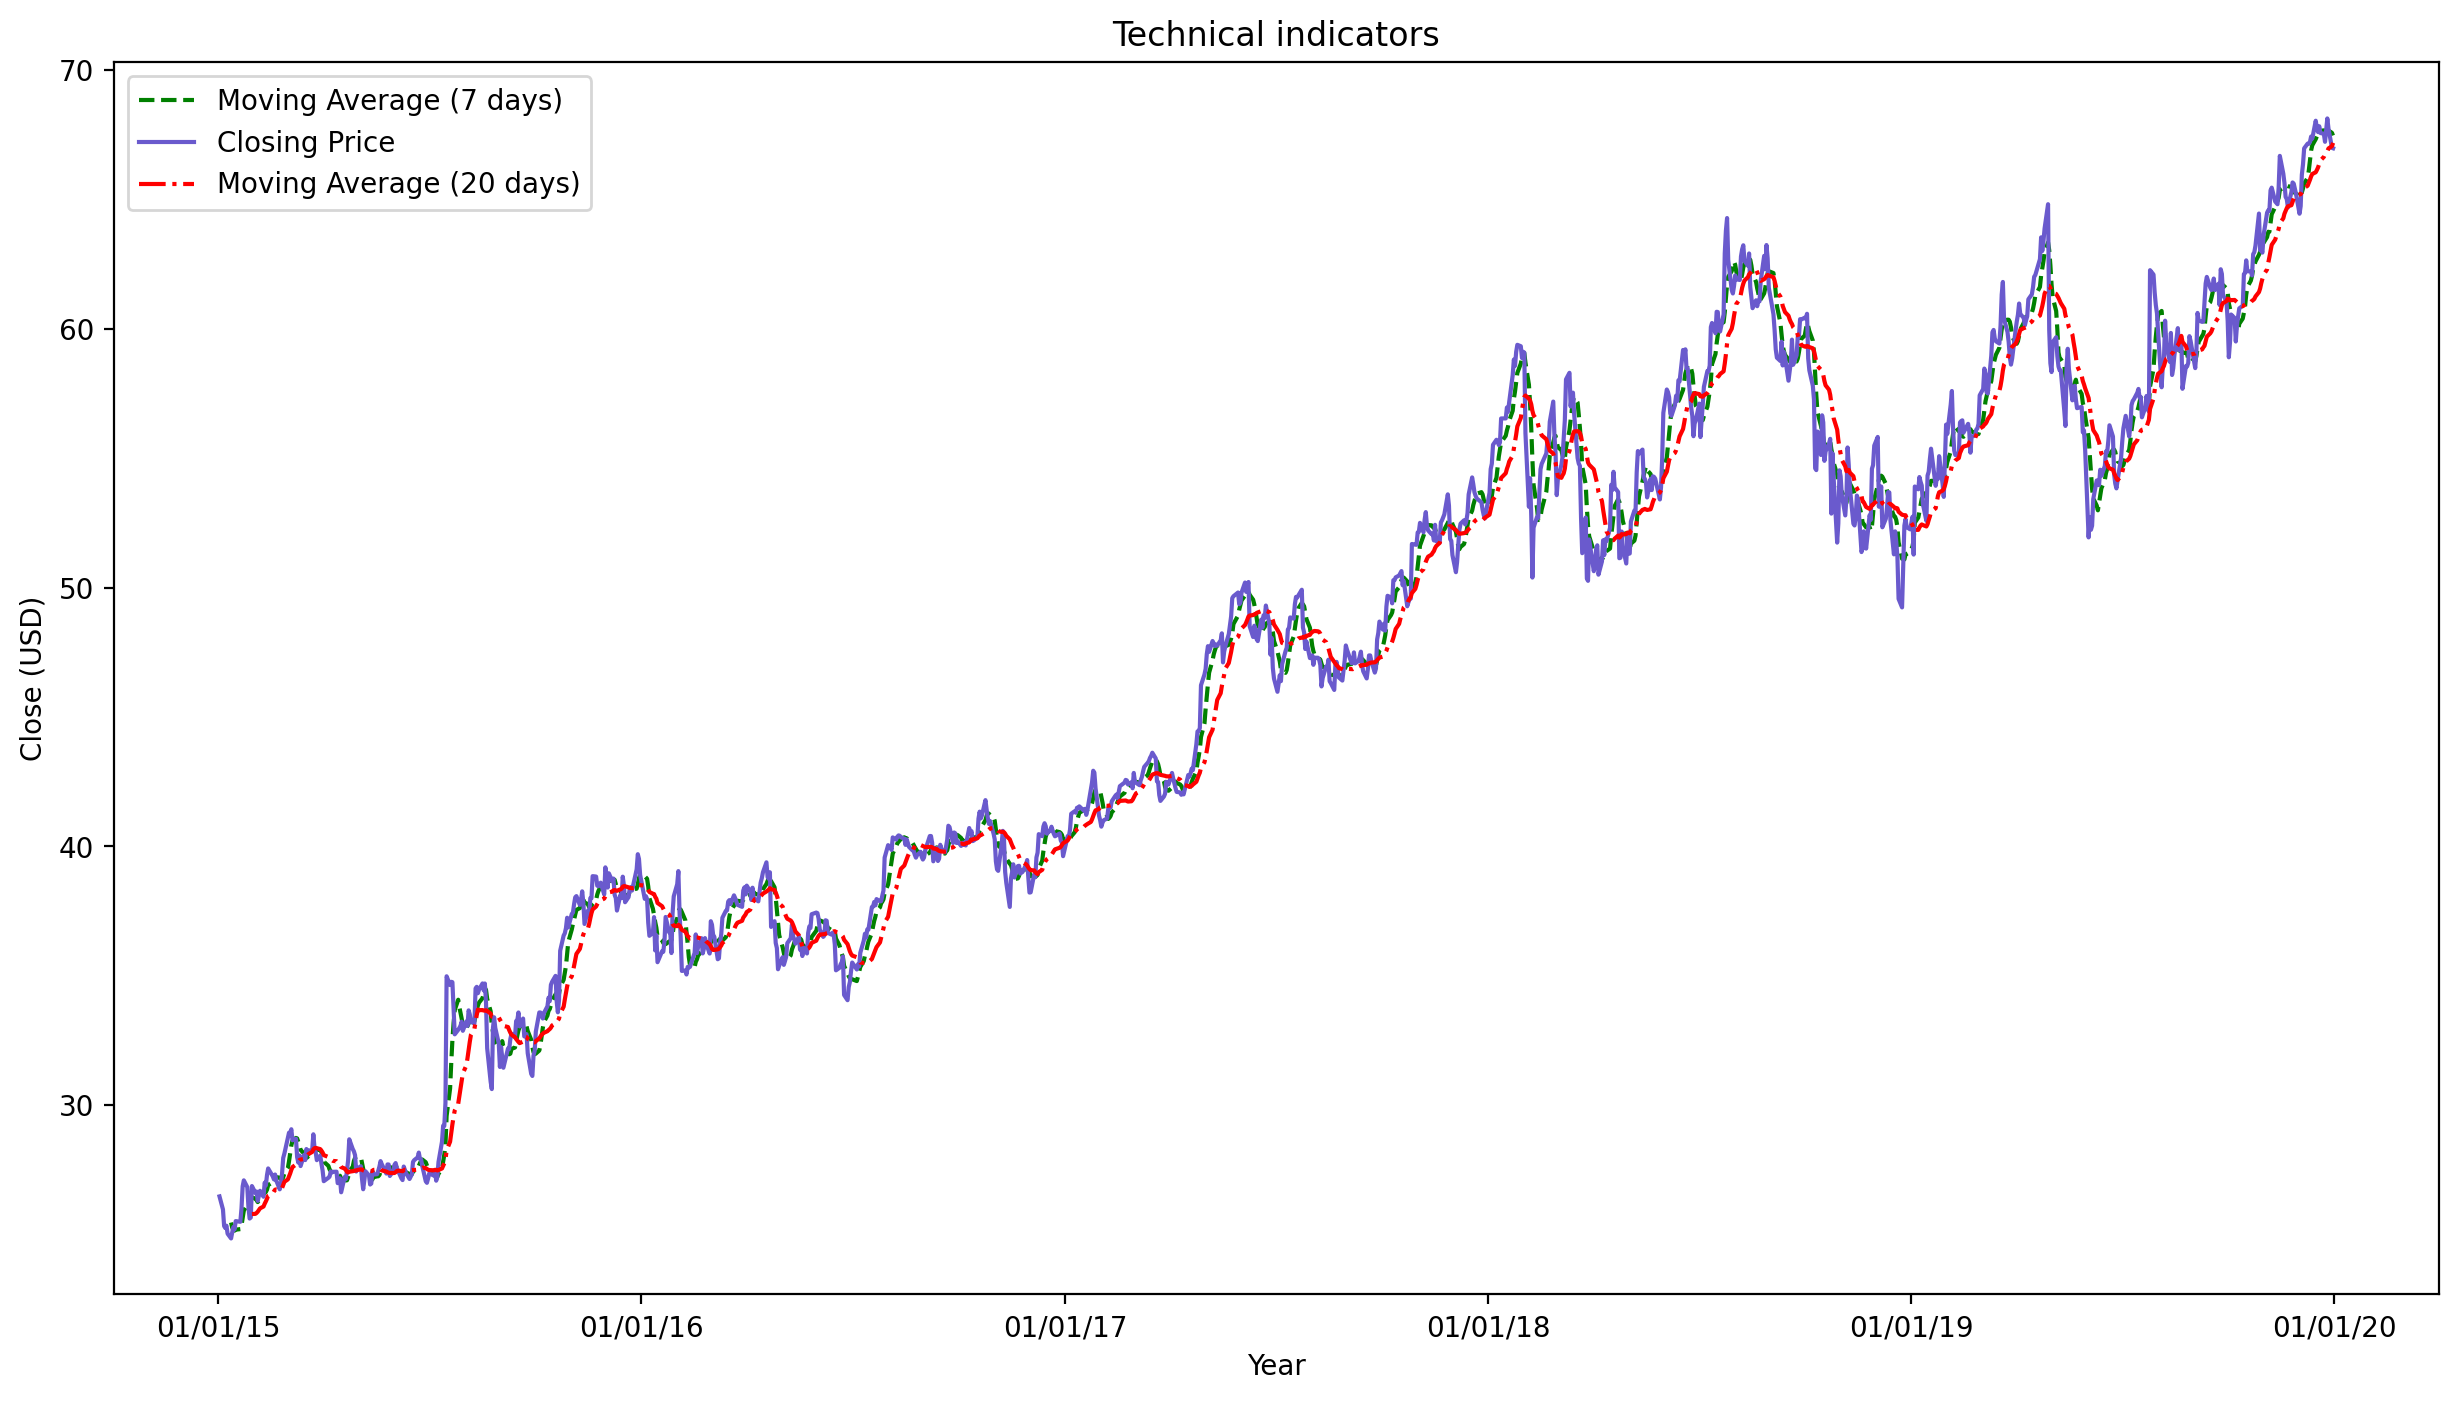

In [47]:
tech_ind(tech_df)

In [48]:
dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill()])
dataset.drop(columns=['sentiment_score'], inplace=True)
dataset

date       open       high        low      close   adjclose  \
0    2015-02-02  26.716000  26.825001  26.086000  26.610001  26.610001   
1    2015-02-03  26.497000  26.872499  26.340500  26.665001  26.665001   
2    2015-02-04  26.657000  26.837500  26.251499  26.305000  26.305000   
3    2015-02-05  26.396500  26.534500  26.282000  26.491501  26.491501   
4    2015-02-06  26.550501  27.011000  26.432501  26.694000  26.694000   
...         ...        ...        ...        ...        ...        ...   
1233 2019-12-24  67.510498  67.600502  67.208504  67.221497  67.221497   
1234 2019-12-26  67.327499  68.160004  67.275497  68.123497  68.123497   
1235 2019-12-27  68.199997  68.352501  67.650002  67.732002  67.732002   
1236 2019-12-30  67.840500  67.849998  66.891998  66.985497  66.985497   
1237 2019-12-31  66.789497  67.032997  66.606499  66.969498  66.969498   

        volume  vader_score        MA7       MA20      MACD      20SD  \
0     75378000     0.259863  26.394786  25.802600 -0.140242  0.703018   
1     47062000     0.264262  26.333000  25.837200 -0.134387  0.728416   
2     33896000     0.327709  26.257143  25.885850 -0.183309  0.725385   
3     33176000     0.199484  26.318858  25.947550 -0.167139  0.721596   
4     42938000     0.232518  26.472072  26.014975 -0.157685  0.725372   
...        ...          ...        ...        ...       ...       ...   
1233  13468000     0.149336  67.644428  66.734549 -0.909795  1.087290   
1234  23662000     0.230894  67.657070  66.858224 -0.777580  1.098056   
1235  23212000     0.212240  67.655284  66.964499 -0.819291  1.073107   
1236  19994000     0.199493  67.568141  67.053549 -0.847956  0.990052   
1237  19514000     0.125885  67.446356  67.179874 -0.709987  0.777878   

      upper_band  lower_band        EMA  logmomentum  
0      27.208636   24.396564  26.571273     3.242983  
1      27.294032   24.380368  26.633758     3.245128  
2      27.336620   24.435081  26.414586     3.231002  
3      27.390743   24.504357  26.465863     3.238345  
4      27.465720   24.564231  26.617954     3.246258  
...          ...         ...        ...          ...  
1233   68.909130   64.559968  67.335674     4.193005  
1234   69.054337   64.662111  67.860889     4.206534  
1235   69.110713   64.818285  67.774965     4.200685  
1236   69.033653   65.073445  67.248653     4.189435  
1237   68.735631   65.624117  67.062549     4.189192  

[1238 rows x 16 columns]

In [49]:
datetime_series = pd.to_datetime(dataset['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='date')
dataset = dataset.drop(columns='date')

In [50]:
def normalize_data(df, range, target_column):

    target_df_series = pd.DataFrame(df[target_column])
    data = pd.DataFrame(df.iloc[:, :])

    X_scaler = MinMaxScaler(feature_range=range)
    y_scaler = MinMaxScaler(feature_range=range)
    X_scaler.fit(data)
    y_scaler.fit(target_df_series)

    X_scale_dataset = X_scaler.fit_transform(data)
    y_scale_dataset = y_scaler.fit_transform(target_df_series)
    
    dump(X_scaler, open('X_scaler.pkl', 'wb'))
    dump(y_scaler, open('y_scaler.pkl', 'wb'))

    return (X_scale_dataset,y_scale_dataset)

In [51]:
def batch_data(x_data,y_data, batch_size, predict_period):
    X_batched, y_batched, yc = list(), list(), list()

    for i in range(0,len(x_data),1):
        x_value = x_data[i: i + batch_size][:, :]
        y_value = y_data[i + batch_size: i + batch_size + predict_period][:, 0]
        yc_value = y_data[i: i + batch_size][:, :]
        if len(x_value) == batch_size and len(y_value) == predict_period:
            X_batched.append(x_value)
            y_batched.append(y_value)
            yc.append(yc_value)

    return np.array(X_batched), np.array(y_batched), np.array(yc)

In [52]:
def split_train_test(data):
    train_size = len(data) - 20
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [53]:
def predict_index(dataset, X_train, batch_size, prediction_period):

    # get the predict data
    train_predict_index = dataset.iloc[batch_size: X_train.shape[0] + batch_size + prediction_period, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + batch_size:, :].index

    return train_predict_index, test_predict_index

### Train-Test-Spliting

In [54]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from keras.utils.vis_utils import plot_model
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

X_scale_dataset,y_scale_dataset = normalize_data(dataset, (-1,1), "close")
X_batched, y_batched, yc = batch_data(X_scale_dataset, y_scale_dataset, batch_size = 5, predict_period = 1)
print("X shape:", X_batched.shape)
print("y shape:", y_batched.shape)
print("yc shape:", yc.shape)

X_train, X_test, = split_train_test(X_batched)
y_train, y_test, = split_train_test(y_batched)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, 5, 1)

X shape: (1233, 5, 15)
y shape: (1233, 1)
yc shape: (1233, 5, 1)


In [55]:
input_dim = X_train.shape[1] 
feature_size = X_train.shape[2] 
output_dim = y_train.shape[1]

In [56]:
stock_name = 'GOOGL'

### Generator Model

In [57]:
def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential([LSTM(units = 1024, return_sequences = True, 
                                    input_shape=(input_dim, feature_size),recurrent_dropout = 0.3),
                               LSTM(units = 512, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 256, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 64, recurrent_dropout = 0.3),
                               Dense(32),
                               Dense(16),
                               Dense(8),
                               Dense(units=output_dim)])
    return model

### Discriminator Model

In [58]:
def make_discriminator_model(input_dim):
    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(8, input_shape=(input_dim+1, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(16, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(32, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=1, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net

### Defining loss functions

In [59]:
def discriminator_loss(real_output, fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    real_loss = loss_f(tf.ones_like(real_output), real_output)
    fake_loss = loss_f(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    loss = loss_f(tf.ones_like(fake_output), fake_output)
    return loss

### Defining Model Training Functions

In [60]:
@tf.function

def train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(real_x, training=True)
        generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
        d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
        real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
        d_real_input = tf.concat([real_y_reshape, yc], axis=1)

        real_output = discriminator(d_real_input, training=True)
        fake_output = discriminator(d_fake_input, training=True)

        g_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    g_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    d_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': g_loss}

In [61]:
def train(real_x, real_y, yc, Epochs, generator, discriminator, g_optimizer, d_optimizer, checkpoint = 50):
    train_info = {}
    train_info["discriminator_loss"] = []
    train_info["generator_loss"] = []

    for epoch in tqdm(range(Epochs)):
        real_price, fake_price, loss = train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer)
        G_losses = []
        D_losses = []
        Real_price = []
        Predicted_price = []
        D_losses.append(loss['d_loss'].numpy())
        G_losses.append(loss['g_loss'].numpy())
        Predicted_price.append(fake_price.numpy())
        Real_price.append(real_price.numpy())

        #Save model every X checkpoints
        if (epoch + 1) % checkpoint == 0:
            tf.keras.models.save_model(generator, f'./models_gan/{stock_name}/generator_V_%d.h5' % epoch)
            tf.keras.models.save_model(discriminator, f'./models_gan/{stock_name}/discriminator_V_%d.h5' % epoch)
            print('epoch', epoch + 1, 'discriminator_loss', loss['d_loss'].numpy(), 'generator_loss', loss['g_loss'].numpy())
    
        train_info["discriminator_loss"].append(D_losses)
        train_info["generator_loss"].append(G_losses)
  
    Predicted_price = np.array(Predicted_price)
    Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
    Real_price = np.array(Real_price)
    Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

    plt.subplot(2,1,1)
    plt.plot(train_info["discriminator_loss"], label='Disc_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Discriminator Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(train_info["generator_loss"], label='Gen_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Generator Loss')
    plt.legend()

    plt.show()

    return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(Real_price)

In [62]:
## Test Code

@tf.function 

def eval_op(generator, real_x):
    generated_data = generator(real_x, training = False)

    return generated_data

In [63]:
def plot_test_data(Real_test_price, Predicted_test_price, index_test):
    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = index_test

    rescaled_Real_price = y_scaler.inverse_transform(Real_test_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_test_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=test_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
  
    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=test_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)
  
    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('Test RMSE: ', RMSE)
    
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], color='#00008B')
    plt.plot(predict_result["predicted_mean"], color = '#8B0000', linestyle='--')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title(f"Prediction on test data for {stock_name}", fontsize=20)
    plt.show()

### Assigning Model Parameters

In [64]:
learning_rate = 5e-4
epochs = 300

g_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
d_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)

generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
discriminator = make_discriminator_model(X_train.shape[1])

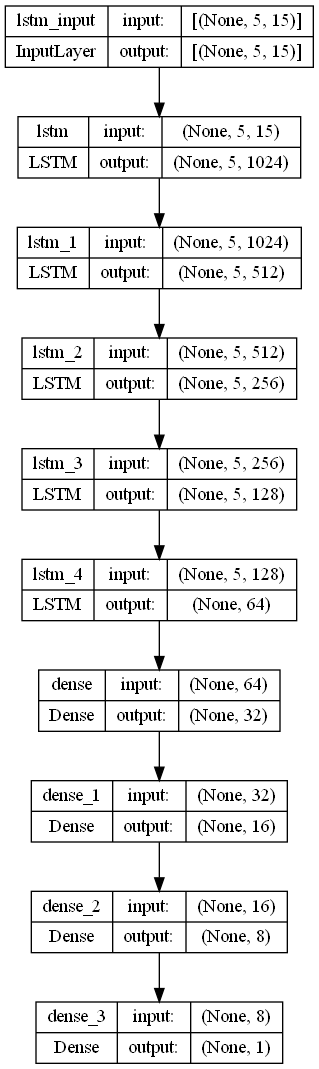

In [65]:
plot_model(generator, to_file='generator_keras_model.png', show_shapes=True)

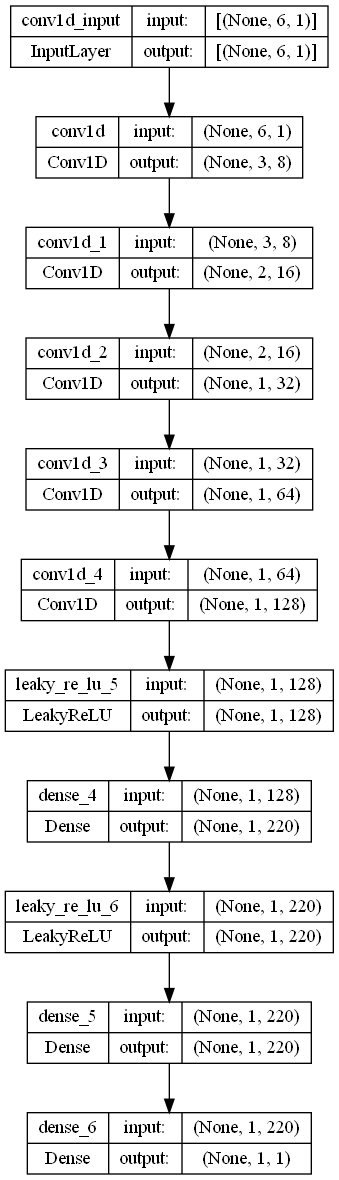

In [66]:
tf.keras.utils.plot_model(discriminator, to_file='discriminator_keras_model.png', show_shapes=True)

### Training Model

 16%|█████████████▏                                                                   | 49/300 [04:29<20:55,  5.00s/it]

 17%|█████████████▌                                                                   | 50/300 [04:35<21:39,  5.20s/it]

epoch 50 discriminator_loss 1.39582 generator_loss 0.6666725


 33%|██████████████████████████▋                                                      | 99/300 [08:36<16:08,  4.82s/it]

 33%|██████████████████████████▋                                                     | 100/300 [08:40<16:06,  4.83s/it]

epoch 100 discriminator_loss 1.3698277 generator_loss 0.7140736


 50%|███████████████████████████████████████▋                                        | 149/300 [12:30<11:50,  4.70s/it]

 50%|████████████████████████████████████████                                        | 150/300 [12:35<11:46,  4.71s/it]

epoch 150 discriminator_loss 1.3891506 generator_loss 0.69094163


 66%|█████████████████████████████████████████████████████                           | 199/300 [16:28<08:00,  4.76s/it]

 67%|█████████████████████████████████████████████████████▎                          | 200/300 [16:33<08:01,  4.82s/it]

epoch 200 discriminator_loss 1.3887334 generator_loss 0.68429947


 83%|██████████████████████████████████████████████████████████████████▍             | 249/300 [20:26<04:08,  4.87s/it]

 83%|██████████████████████████████████████████████████████████████████▋             | 250/300 [20:31<04:09,  4.99s/it]

epoch 250 discriminator_loss 1.386514 generator_loss 0.6925706


100%|███████████████████████████████████████████████████████████████████████████████▋| 299/300 [24:29<00:04,  4.88s/it]

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [24:34<00:00,  4.91s/it]

epoch 300 discriminator_loss 1.39308 generator_loss 0.69909775


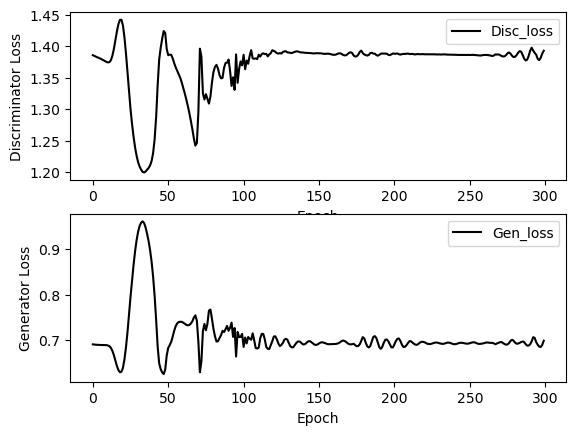

In [67]:
predicted_price, real_price, RMSPE = train(X_train, y_train, yc_train, epochs, generator, discriminator, g_optimizer, d_optimizer)

In [68]:
test_generator = tf.keras.models.load_model(f'./models_gan/{stock_name}/generator_V_{epochs-1}.h5')
test_generator.compile(optimizer='adam', loss='binary_crossentropy')

### Predicting Stock Price and evaluating the model

Test RMSE:  2.04787819181744


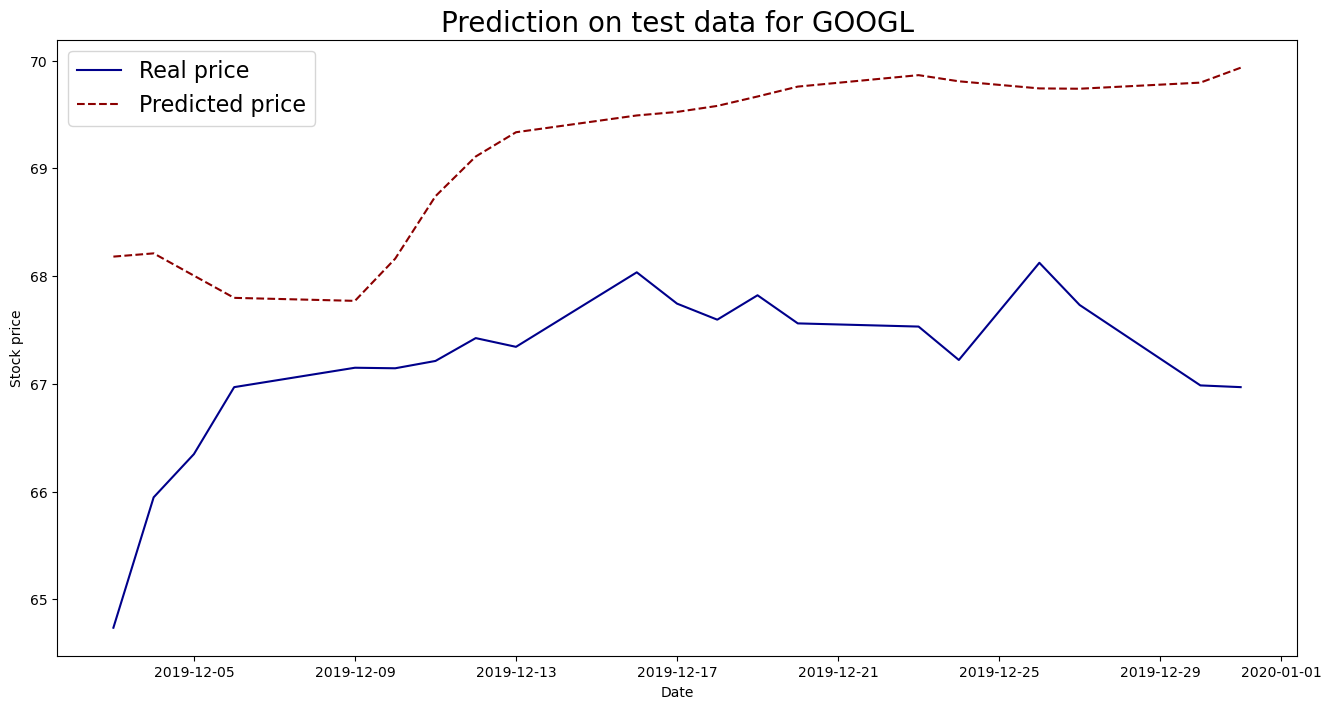

In [69]:
predicted_test_data = eval_op(test_generator, X_test)
plot_test_data(y_test, predicted_test_data,index_test)

## Google Stock Prediction using Autoregressive Integrated Moving Average (ARIMA) 

In [70]:
df_merged_stock_sentimental_GOOGL = pd.read_csv(r'df_merged_stock_sentimental_GOOGL.csv')

df_merged_stock_sentimental_GOOGL = pd.read_csv(r'df_merged_stock_sentimental_GOOGL.csv',
                                        encoding='utf-8' ,
                                        parse_dates=['date']
                                        )
df_merged_stock_sentimental_GOOGL

date       open       high        low      close   adjclose  \
0    2015-01-02  26.629999  26.790001  26.393999  26.477501  26.477501   
1    2015-01-05  26.357500  26.399500  25.887501  25.973000  25.973000   
2    2015-01-06  26.025000  26.060499  25.277500  25.332001  25.332001   
3    2015-01-07  25.547501  25.574499  25.182501  25.257500  25.257500   
4    2015-01-08  25.075500  25.375000  24.750999  25.345501  25.345501   
...         ...        ...        ...        ...        ...        ...   
1253 2019-12-24  67.510498  67.600502  67.208504  67.221497  67.221497   
1254 2019-12-26  67.327499  68.160004  67.275497  68.123497  68.123497   
1255 2019-12-27  68.199997  68.352501  67.650002  67.732002  67.732002   
1256 2019-12-30  67.840500  67.849998  66.891998  66.985497  66.985497   
1257 2019-12-31  66.789497  67.032997  66.606499  66.969498  66.969498   

        volume  vader_score  sentiment_score  
0     26480000     0.124008         0.612613  
1     41182000     0.352378         1.177489  
2     54456000     0.364896         1.213523  
3     46918000     0.308681         0.824841  
4     73054000     0.236480         0.894027  
...        ...          ...              ...  
1253  13468000     0.149336         0.857143  
1254  23662000     0.230894         1.385714  
1255  23212000     0.212240         1.081761  
1256  19994000     0.199493         0.968750  
1257  19514000     0.125885         0.700000  

[1258 rows x 9 columns]

In [71]:
df_merged_stock_sentimental_GOOGL = df_merged_stock_sentimental_GOOGL.dropna()

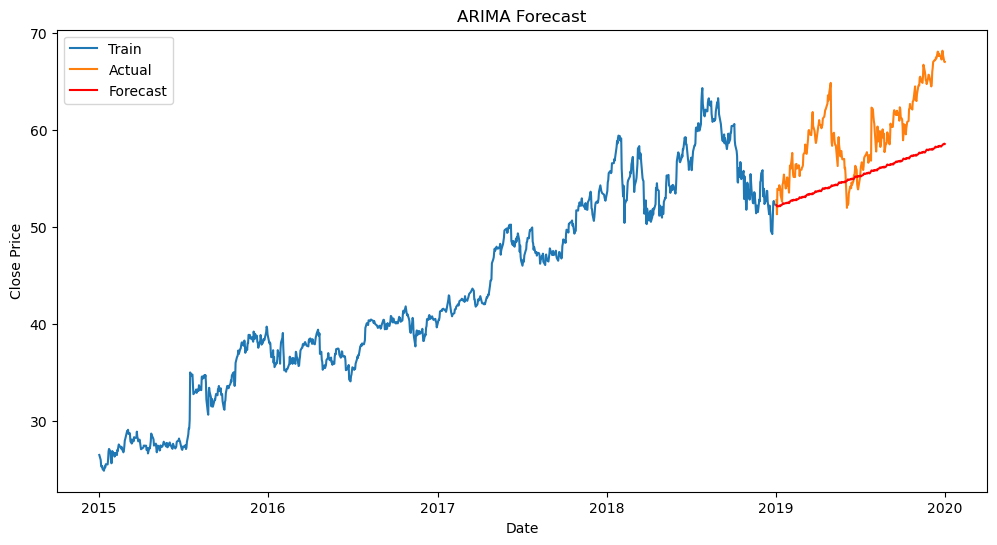

In [72]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Convert index to datetime
df_merged_stock_sentimental_GOOGL.index = pd.to_datetime(df_merged_stock_sentimental_GOOGL['date'])

# Filling missing values  
df_merged_stock_sentimental_GOOGL.fillna(method='ffill', inplace=True)

# Splitting the dataset
train_size = int(len(df_merged_stock_sentimental_GOOGL) * 0.8) 
train_data = df_merged_stock_sentimental_GOOGL.iloc[:train_size]
test_data = df_merged_stock_sentimental_GOOGL.iloc[train_size:]

# Model creation

model = ARIMA(train_data['close'], order=(5,1,0), seasonal_order=(1,1,1,12))
sarima_model = model.fit()

# Forecast
forecast = sarima_model.forecast(steps=len(test_data))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['close'], label='Train')
plt.plot(test_data.index, test_data['close'], label='Actual')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# MAE
mae = mean_absolute_error(test_data['close'], forecast)

# MSE
mse = mean_squared_error(test_data['close'], forecast)

# RMSE
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4.453032039707103
Mean Squared Error (MSE): 26.67546911855546
Root Mean Squared Error (RMSE): 5.164830018360281
